#CS210 Spotify Project


Exploratory Data Analysis is a fundamental process in the field of data science that helps us gain insights into a dataset by summarizing its main characteristics and identifying patterns and relationships within the data. In this project, I will be applying exploratory data analysis techniques to my Spotify playlist to better understand the characteristics of the songs in the playlist. Through this project, I will learn scraping, visualize distributions, and uncover insights that can help me make informed decisions about the my top track's content and structure.

 **I got help from ChatGPT for this Project, I also examined previous projects on github.

**In this project, I received the data using Spotify Web API. Also I use this tool. https://www.chosic.com/spotify-playlist-analyzer/?plid=4wyQnWDDys6T8A2ni96VfG

1 - In this assignment, I will analyze my study playlist, and this playlist is available as a csv table on a Github. You can examine the csv table from Github, I also provide client_id, client_secret, and redirect_uri content for this.

## Introduction

In the digital age, music streaming has become a pivotal aspect of how we interact with and consume music. Spotify, a leader in this domain, not only revolutionizes the listening experience but also generates a wealth of data that offers profound insights into listening habits, music popularity, and artist reach. This project leverages Spotify's extensive dataset to unravel patterns and narratives that dwell within the numbers and notes.

</font>


### Problem Definition

</font>  

The landscape of music streaming services like Spotify is rich with data that represents a complex tapestry of user preferences, artist popularity, and track characteristics. This dataset, consisting of various attributes such as track names, album titles, artists, release dates, and popularity scores, presents an opportunity to delve into the analytics of music streaming. The central question driving this investigation is: How can we utilize this dataset to model and understand the factors that contribute to a track's popularity on Spotify?

### Utilized Data

</font>  

My data set is about my Spotify playlist. It includes 309 songs in 26 columns.

**HTTPS:** https://github.com/egecangar/my_spotify_exploration.git

**Columns:**  
Below, you can find all the set of features, provided in the dataset:

1. **Song:** The name of the track.
2. **Artist:** The name of the artist or group that performed the song.
3. **Popularity:** A numerical measure of the song's popularity.
4. **BPM (Beats Per Minute):** The tempo or speed of the song in beats per minute.
5. **Genres:** The musical genres associated with the song.
6. **Parent Genres:** The broader or parent musical genres of the song.
7. **Album:** The name of the album containing the song.
8. **Album Date:** The release date of the album.
9. **Time:** The duration of the song in minutes and seconds.
10. **Dance:** A numerical value indicating danceability.
11. **Energy:** A numerical value representing the energy level of the song.
12. **Acoustic:** A numerical value indicating the acousticness of the song.
13. **Instrumental:** A numerical value indicating the instrumentalness of the song.
14. **Happy:** A numerical value representing the mood or happiness of the song.
15. **Speech:** A numerical value indicating the presence of speech or lyrics in the song.
16. **Live:** Indicates if the song is a live recording (1 for live, 0 for studio).
17. **Loud:** A numerical value indicating the loudness of the song.
18. **Key:** The musical key in which the song is composed.
19. **Time Signature:** The time signature of the song.
20. **Added At:** The date or timestamp when the song was added to the dataset.
21. **Spotify Track Id:** Unique identifiers assigned to each track by Spotify.
22. **Album Label:** The name of the record label associated with the album.
23. **Camelot:** Information about the musical key or tonal center of the song.
24. **Spotify Track Img:** URLs or references to images associated with the Spotify tracks.

In [ ]:
!pip install bs4
!pip install requests
!pip install time
!pip install sys

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time
ERROR: Could not find a version that satisfies the requirement sys (from versions: none)
ERROR: No matching distribution found for sys


In [1]:
pip install scikit-learn


In [3]:
pip install spotipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 4.7 MB/s eta 0:00:00


In [21]:
pip install scikit-learn matplotlib


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bs4
import requests
import random as ran
import sys
import time
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
from statsmodels.stats.weightstats import ztest


In [6]:
df = pd.read_csv('study.csv')
df.head()

#                  Song                        Artist  Popularity  BPM  \
0  1         Round & Round                     Bob Moses          50  122   
1  2  Devil's Prescription                           ZHU          40  122   
2  3          Take My Soul                   ZHU,Devault          50  107   
3  4     Days Before Grace                           ZHU          39   88   
4  5        Blind Believer  ZHU,Reo Cragun,Rexx Life Raj          35  104   

                                              Genres  \
0                canadian electronic, canadian house   
1                                 edm, electro house   
2                   edm, electro house, vapor twitch   
3                                 edm, electro house   
4  edm, electro house, canadian hip hop, trap sou...   

              Parent Genres              Album  Album Date   Time  ...  Live  \
0                Electronic      Round & Round  2023-10-06  03:39  ...    10   
1                Electronic  Days Before Grace  2023-09-08  03:47  ...    10   
2                Electronic  Days Before Grace  2023-09-08  05:01  ...    20   
3                Electronic  Days Before Grace  2023-09-08  04:22  ...    10   
4  Hip Hop, Electronic, R&B  Days Before Grace  2023-09-08  03:29  ...    10   

   Loud          Key  Time Signature    Added At        Spotify Track Id  \
0    -5      A Minor               4  2024-01-13  6aUk3zMedZd18Axi3ZO8lN   
1    -6  G#/A♭ Minor               4  2024-01-13  2ZK6XVwxGKzdEqJn3y9fwi   
2    -5  G#/A♭ Minor               4  2024-01-13  2Qe6S4Xy5rS2Vidoaxp6b0   
3    -4      D Major               4  2024-01-13  3zptIHCyfvKTS8Wnt1p6hI   
4    -4      D Major               4  2024-01-13  0IAtBxqtDL45CU85wcoQHD   

                            Album Label  Camelot Spotify Track Img  \
0  Domino Recording Company/Astralwerks       8A               NaN   
1                           Astralwerks       1A               NaN   
2                           Astralwerks       1A               NaN   
3                           Astralwerks      10B               NaN   
4                           Astralwerks      10B               NaN   

                                        Song Preview  
0  https://i.scdn.co/image/ab67616d00004851ef1983...  
1  https://i.scdn.co/image/ab67616d00004851021b1e...  
2  https://i.scdn.co/image/ab67616d00004851021b1e...  
3  https://i.scdn.co/image/ab67616d00004851021b1e...  
4  https://i.scdn.co/image/ab67616d00004851021b1e...  

[5 rows x 26 columns]

In [ ]:
df.drop(columns=['#'], inplace=True)

In [ ]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 309
Number of columns: 29


Currently I have 309 rows and 9 columns in the dataset, and here are the data types:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   #                  309 non-null    int64 
 1   Song               309 non-null    object
 2   Artist             309 non-null    object
 3   Popularity         309 non-null    int64 
 4   BPM                309 non-null    int64 
 5   Genres             291 non-null    object
 6   Parent Genres      291 non-null    object
 7   Album              309 non-null    object
 8   Album Date         309 non-null    object
 9   Time               309 non-null    object
 10  Dance              309 non-null    int64 
 11  Energy             309 non-null    int64 
 12  Acoustic           309 non-null    int64 
 13  Instrumental       309 non-null    int64 
 14  Happy              309 non-null    int64 
 15  Speech             309 non-null    int64 
 16  Live               309 non-null    int64 
 1

In [ ]:
categorical_list = list(df.select_dtypes(include=['object']).columns)

print("Categorical variables:", categorical_list)

Categorical variables: ['Song', 'Artist', 'Genres', 'Parent Genres', 'Album', 'Album Date', 'Time', 'Key', 'Added At', 'Spotify Track Id', 'Album Label', 'Camelot', 'Spotify Track Img', 'Song Preview']


Song:

Turn You Up                              38
About Us                                 22
Where Do We Go                           21
SET ME FREE                              19
FOCUS (feat. KYE) - Night Tales Remix    19
                                         ..
La Isla Bonita                            1
La La La                                  1
Bir Derdim Var                            1
Oyunbozan                                 1
Özgür                                     1
Name: Song, Length: 74, dtype: int64



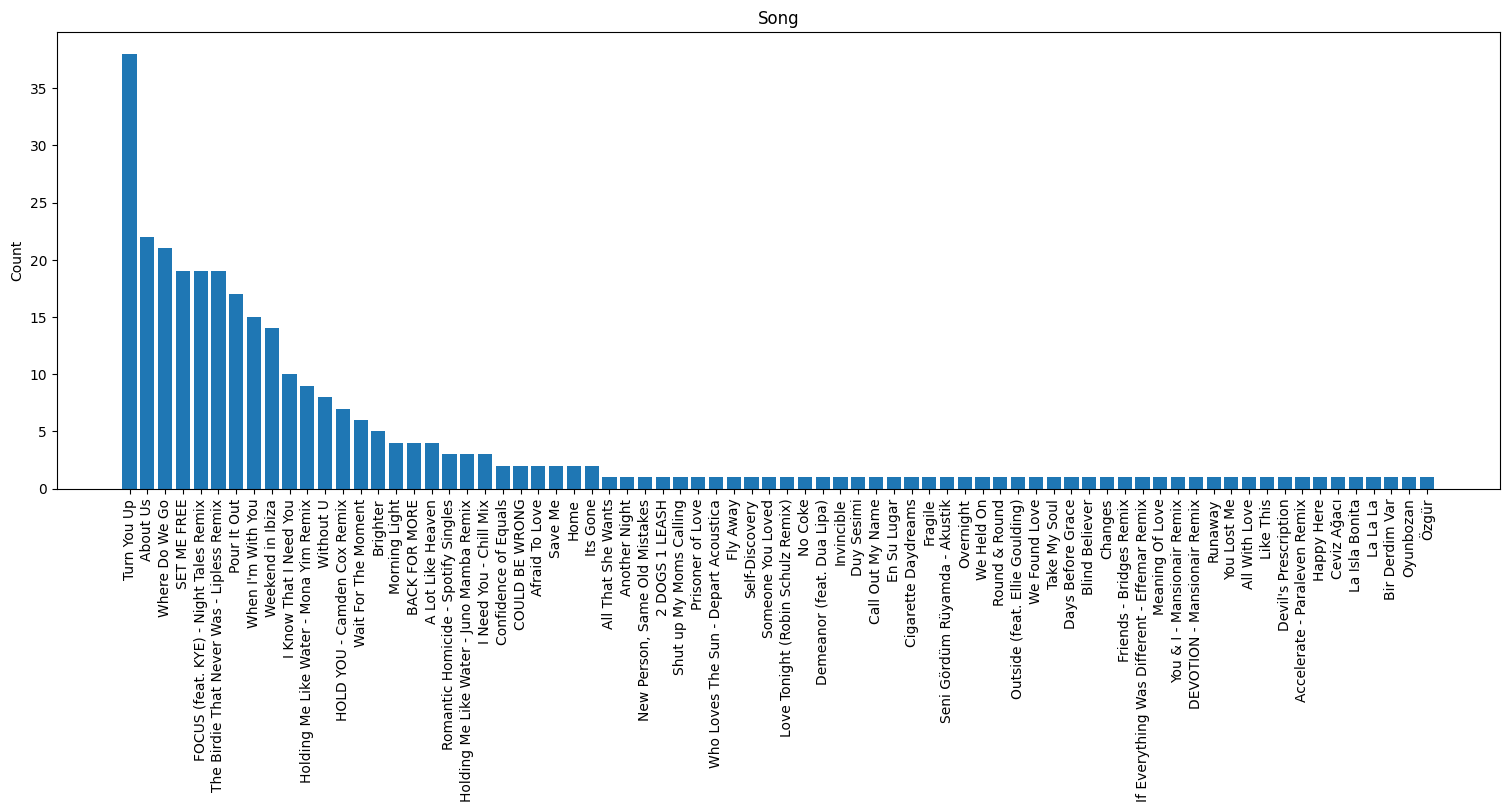


##################################################################

Artist:

Kaskade,Winn Winn                  38
Angrybaby                          23
Kaskade                            22
Kyle Watson                        21
Boo Seeka,Lipless                  19
                                   ..
Calvin Harris,Ellie Goulding        1
The Weeknd                          1
Ali Bakgor,onebit.,Beacon Bloom     1
Vandelux,Tyler Mann                 1
Aksan                               1
Name: Artist, Length: 67, dtype: int64



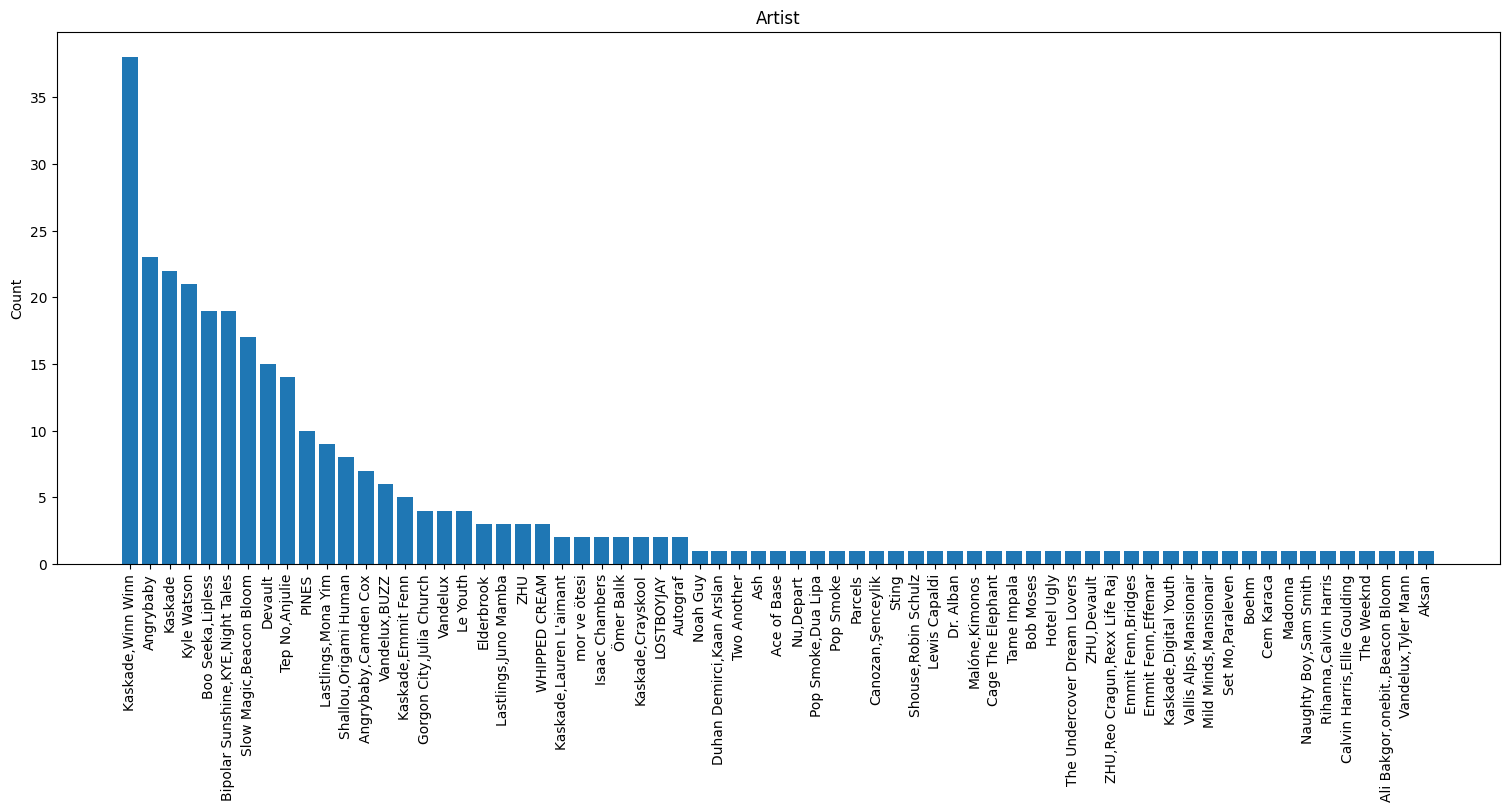


##################################################################

Genres:

edm, electro house, pop dance, progressive electro house, progressive house, vocal house,                                41
stutter house                                                                                                            34
edm, electro house, pop dance, progressive electro house, progressive house, vocal house                                 22
bass house, fidget house, house, tech house                                                                              21
gauze pop, australian r&b, australian dance                                                                              19
aussietronica, australian indie, melodic house                                                                           19
chillwave, gauze pop, vapor twitch,                                                                                      17
vapor twitch                                          

<ipython-input-7-3147f11b6eeb>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


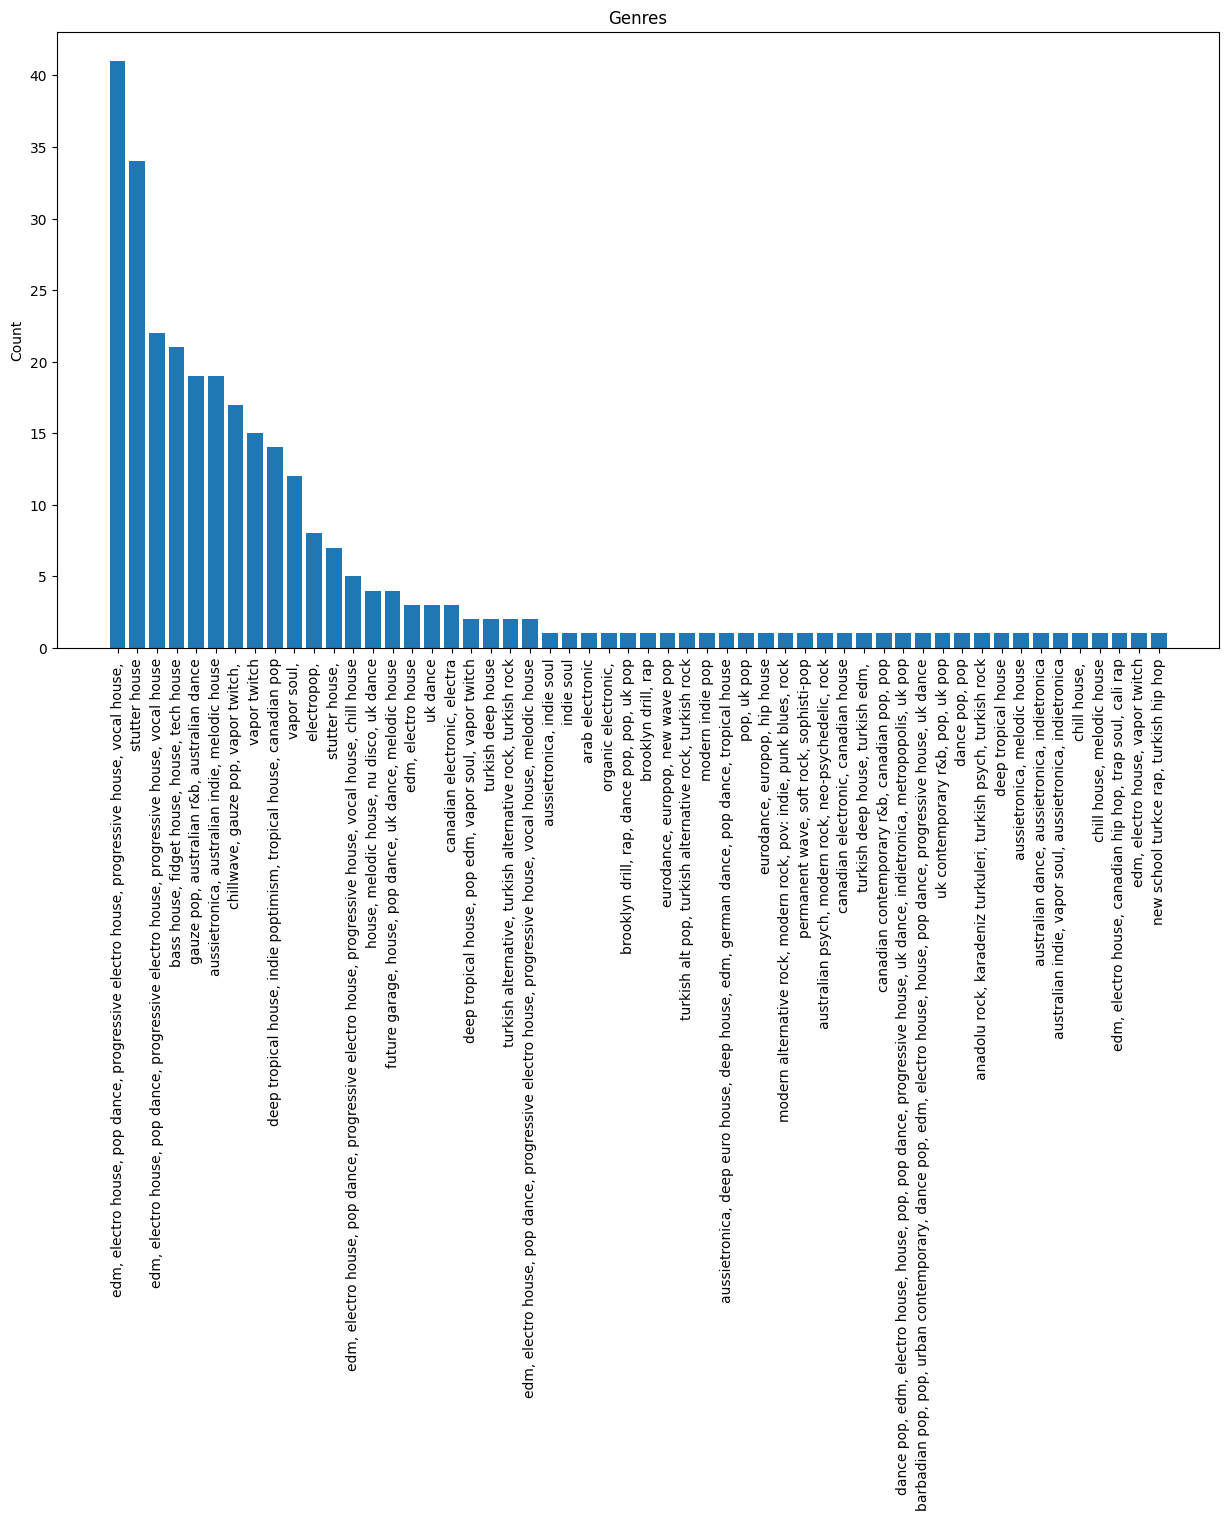


##################################################################

Parent Genres:

edm, electro house, pop dance, progressive electro house, progressive house, vocal house,                  40
stutter house                                                                                              34
edm, electro house, pop dance, progressive electro house, progressive house, vocal house                   22
bass house, fidget house, house, tech house                                                                21
aussietronica, australian indie, melodic house                                                             19
gauze pop, australian r&b, australian dance                                                                19
Electronic                                                                                                 17
chillwave, gauze pop, vapor twitch,                                                                        17
vapor twitch                       

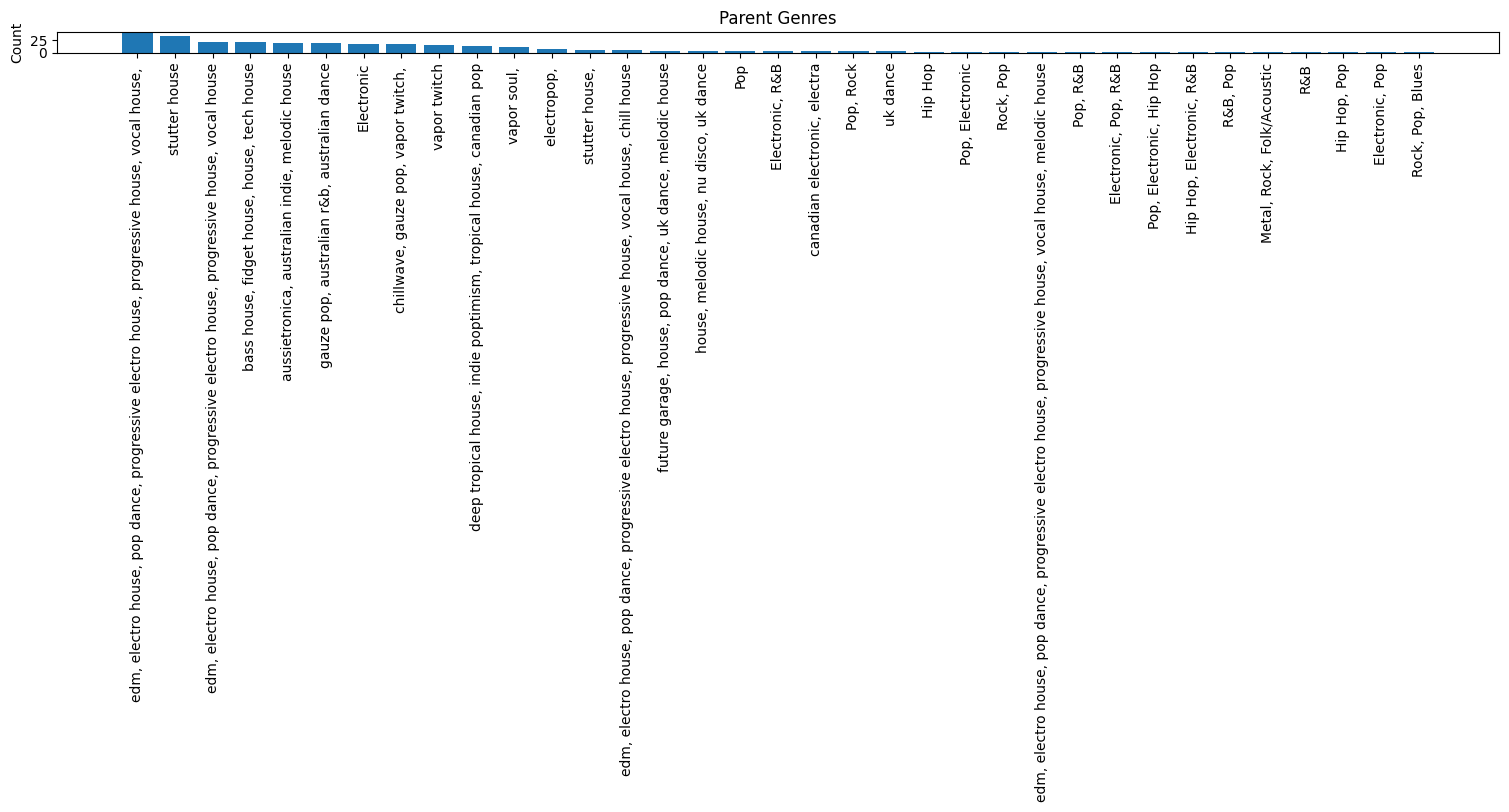


##################################################################

Album:

REDUX 006                                    70
See Your Truth EP                            21
SET ME FREE                                  19
FOCUS (feat. KYE) [Night Tales Remix]        19
The Birdie That Never Was (Lipless Remix)    19
                                             ..
Talk That Talk                                1
Motion                                        1
My Dear Melancholy,                           1
We Held On                                    1
Özgür                                         1
Name: Album, Length: 62, dtype: int64



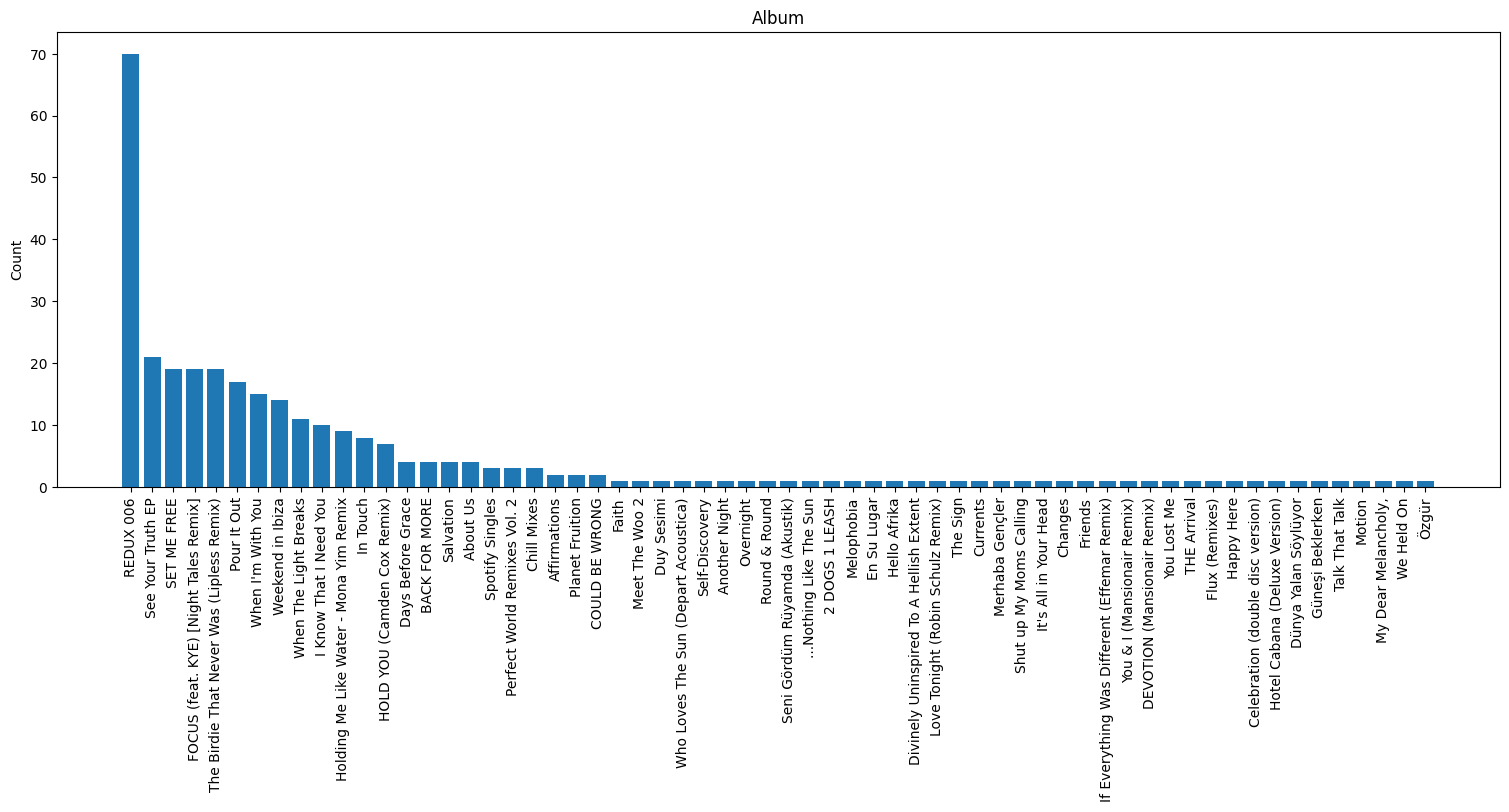


##################################################################

Album Date:

2023-10-27    79
2023-10-06    56
2023-09-22    29
2023-08-11    22
2023-09-08    20
2023-09-01    19
2023-09-15    12
2023-10-12     9
2023-07-28     8
2023-11-10     4
2023-07-21     4
2023-09-29     4
2023-09-06     3
2023-11-16     3
2023-08-18     2
2020-02-07     2
2017-01-01     2
2022-12-02     2
2020-01-19     1
2019-05-17     1
1991-02-18     1
2021-09-03     1
2013-10-08     1
1987-01-01     1
1993-12-24     1
2017-06-21     1
2022-03-18     1
2021-07-16     1
2021-06-10     1
2019-08-09     1
2012-12-17     1
2015-07-17     1
2022-07-29     1
2020-02-10     1
2020-02-27     1
2018-03-30     1
2014-10-31     1
2011-11-18     1
2004-04-16     1
2013-01-01     1
2009-09-18     1
1987-00-00     1
2023-07-07     1
2019-12-19     1
2023-09-21     1
2023-10-05     1
2021-03-12     1
Name: Album Date, dtype: int64



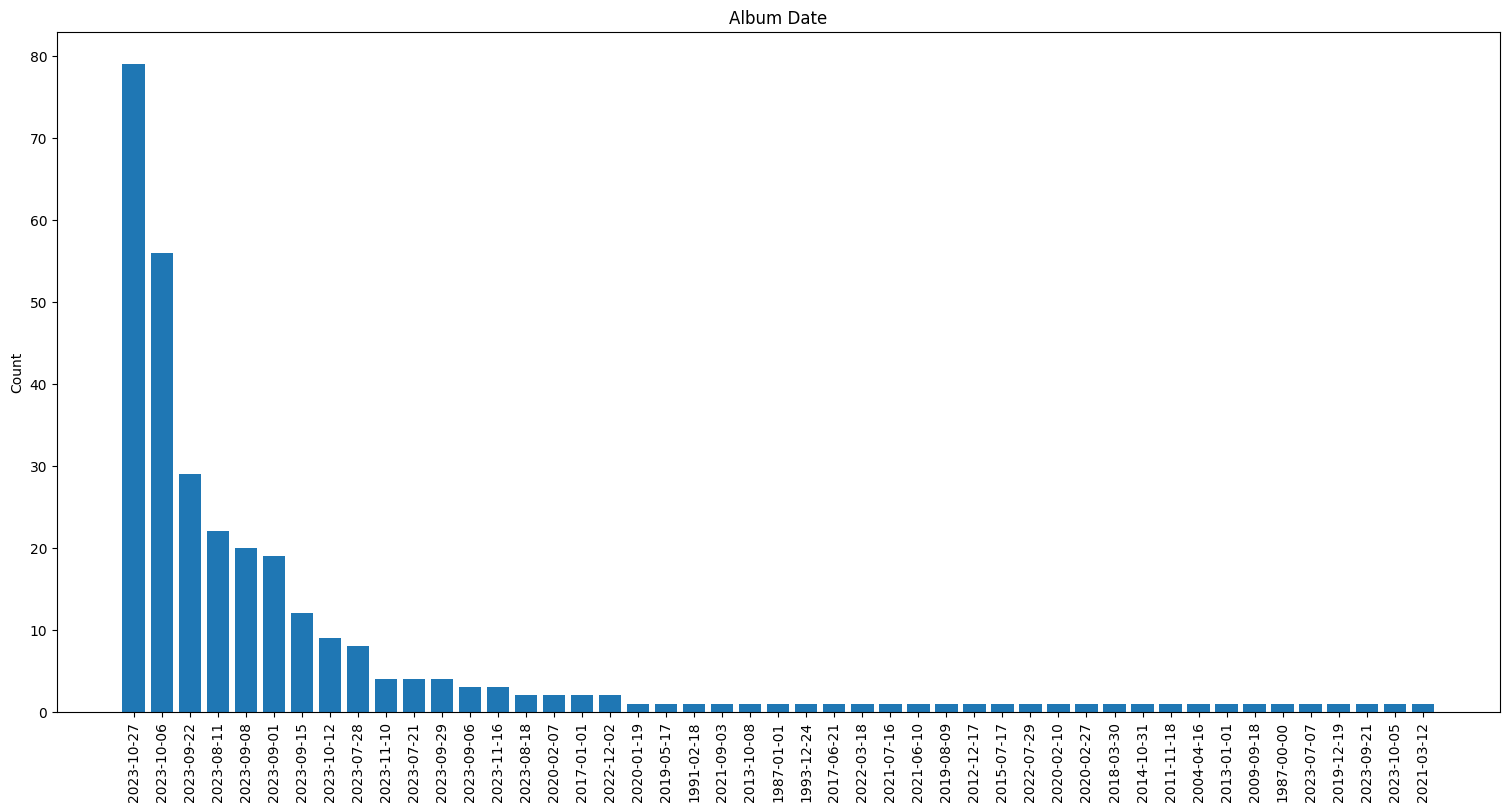


##################################################################

Time:

03:49    38
02:55    26
03:39    23
03:48    20
03:00    19
04:06    19
03:07    19
03:35    16
04:40    14
03:27    10
05:29    10
04:11     9
03:05     7
02:57     6
03:41     5
04:33     4
03:53     4
03:15     3
04:09     3
03:17     3
03:29     3
03:04     3
02:40     2
03:47     2
03:11     2
03:36     2
04:22     2
05:11     2
06:41     2
03:06     2
03:54     2
03:24     2
04:05     2
03:02     1
07:28     1
02:25     1
03:28     1
03:31     1
03:56     1
02:54     1
02:07     1
04:18     1
02:45     1
05:49     1
06:03     1
02:42     1
02:44     1
04:37     1
03:42     1
04:02     1
06:26     1
05:01     1
02:26     1
03:57     1
04:19     1
03:18     1
Name: Time, dtype: int64



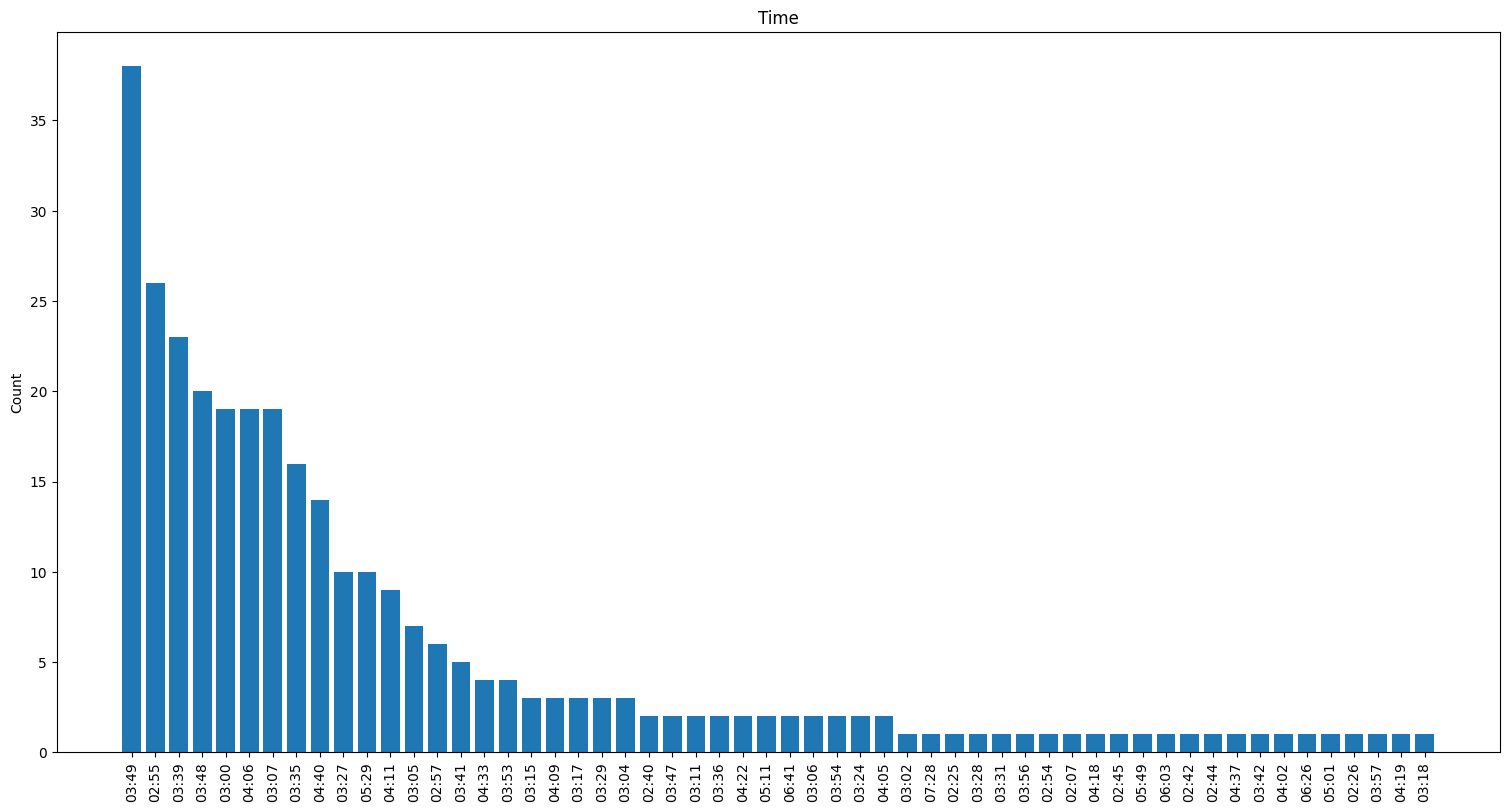


##################################################################

Key:

G#/A♭ Major    58
E Minor        46
A#/B♭ Minor    42
A Minor        35
C♯/D♭ Minor    23
B Minor        18
C♯/D♭ Major    16
G Minor        14
F#/G♭ Major    12
F#/G♭ Minor    12
G#/A♭ Minor     9
C Major         6
C Minor         5
D#/E♭ Minor     4
D Major         3
D Minor         2
D#/E♭ Major     2
A#/B♭ Major     1
B Major         1
Name: Key, dtype: int64



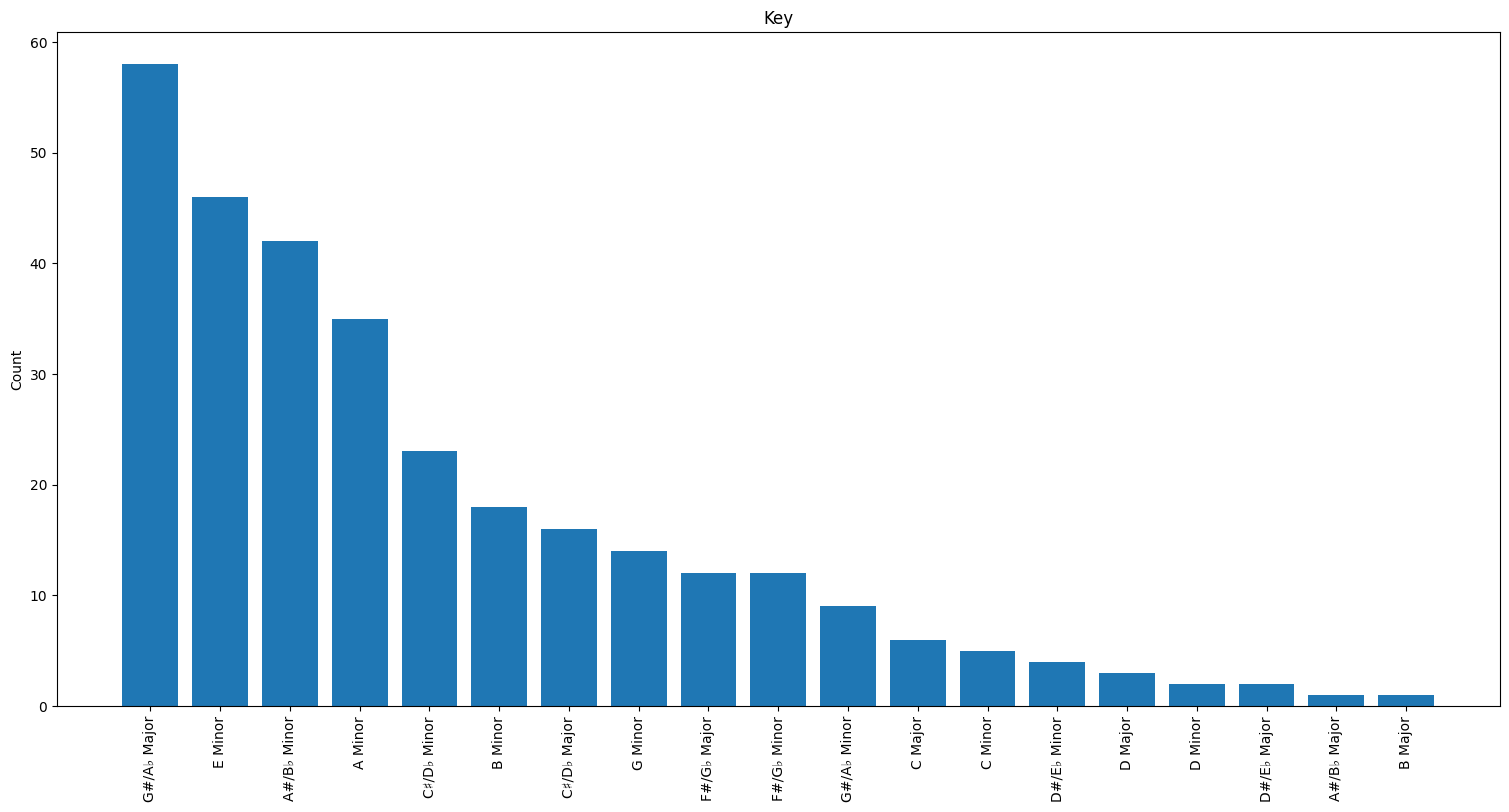


##################################################################

Added At:

2024-01-15    149
2024-01-18    133
2024-01-13     27
Name: Added At, dtype: int64



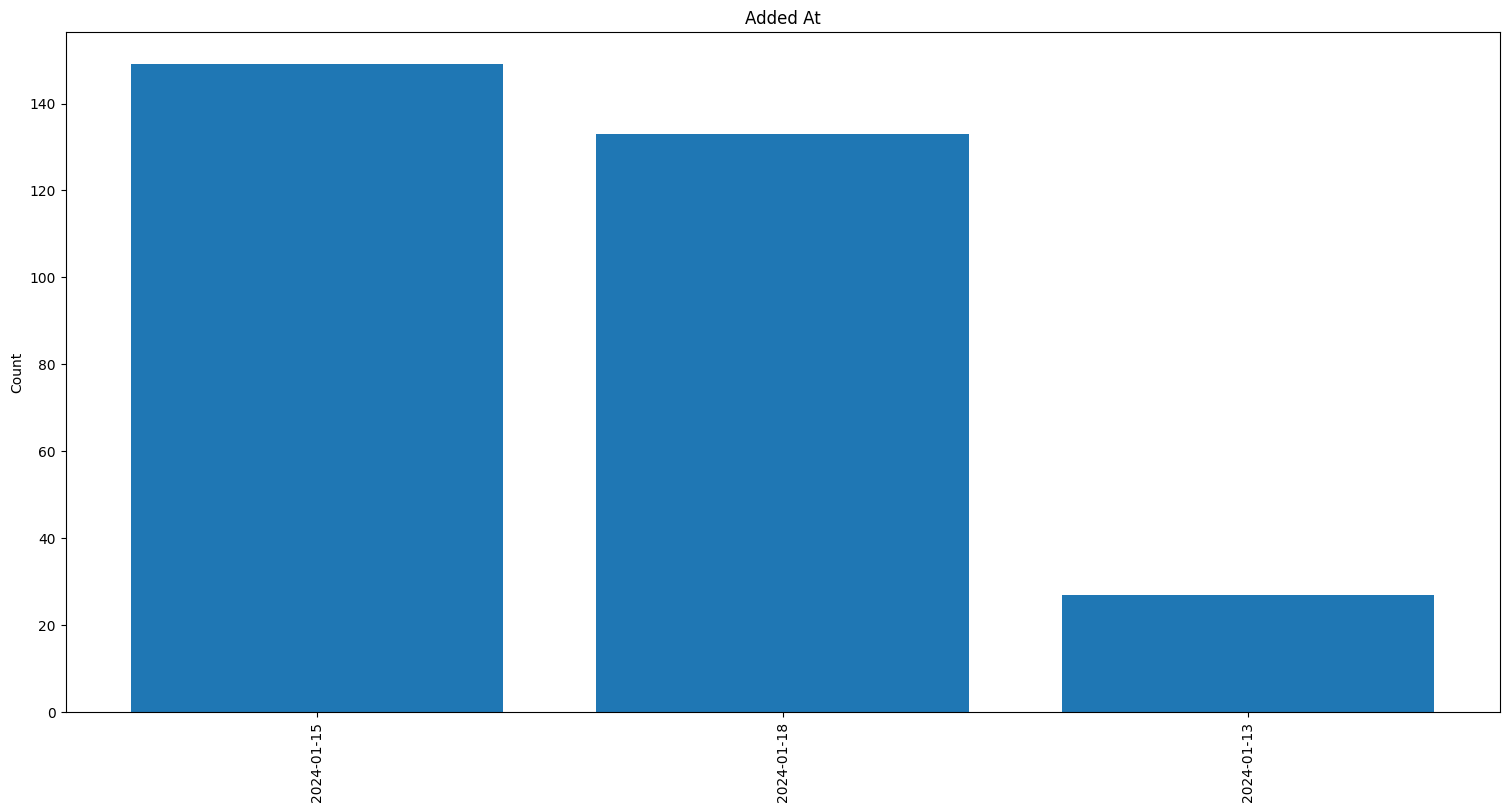


##################################################################

Spotify Track Id:

1CwnBiu5WGgq5esdmjDj16    38
1su9slnFDaDCLzrpxKLIdr    22
3VuDv4H7W5mxOu7MOqbRMa    21
5kVwOShLwLmUq0s1NrsRvy    19
6QK2uSdZb8oh9T5O3KeHR4    19
                          ..
2Iib2MV3ECFJAourgP9dlY     1
3wPPWcVuinAU7dXcJXtCID     1
5UV2oqgMXvlkOvvtK3aT7f     1
5DbtYgRjkUIapSm2Ilr81D     1
3gxURJOQjemF0PKAQKb1jG     1
Name: Spotify Track Id, Length: 74, dtype: int64



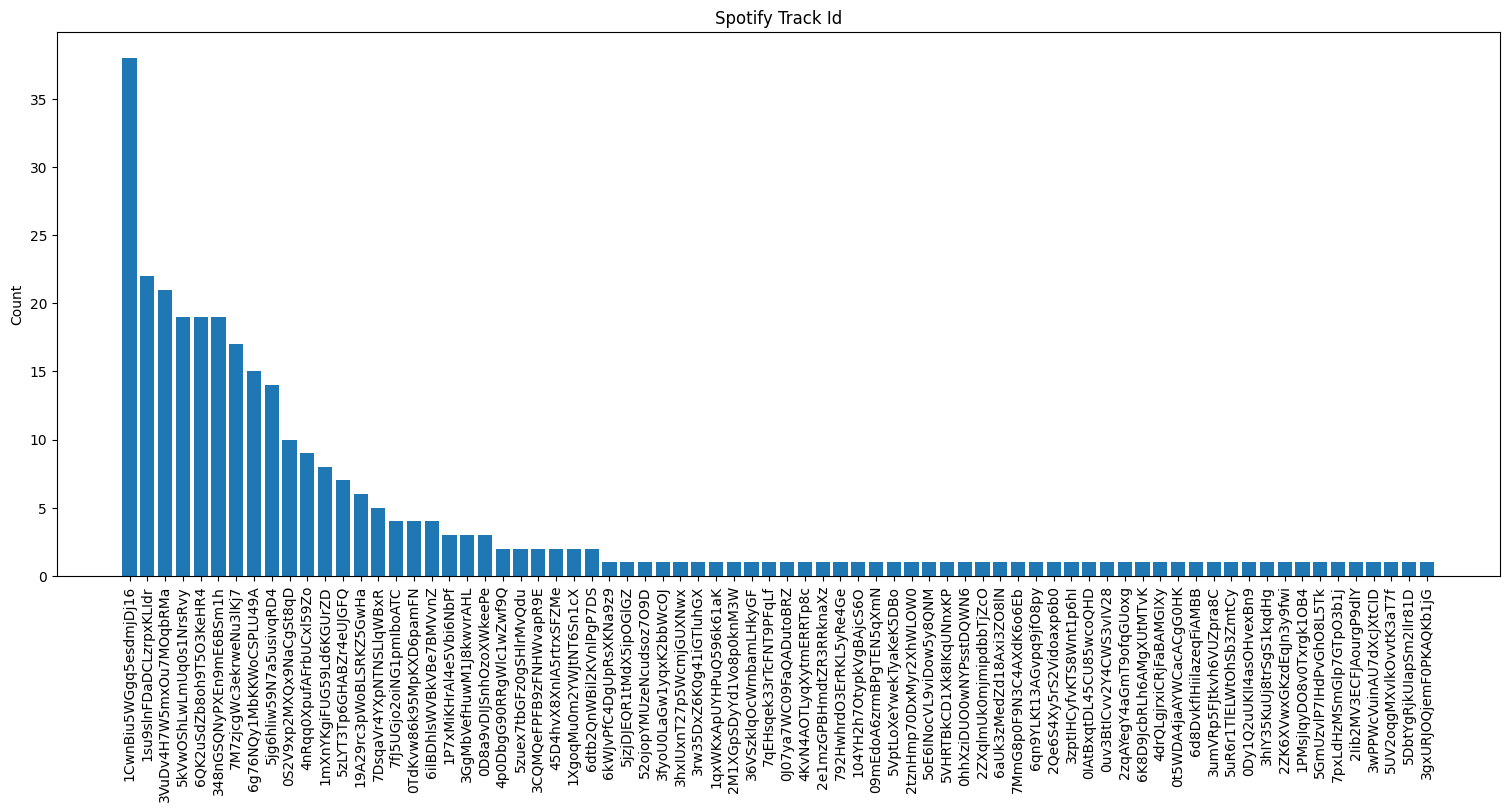


##################################################################

Album Label:

Arkade                                               70
TH3RD BRAIN                                          44
No Context Records                                   21
Noize Records                                        19
Palm Tree Records                                    19
Slow Magic                                           17
Ultra Records, LLC                                   16
Tep No Records                                       14
Rose Avenue                                          12
PINES                                                10
Sleeptalker LLC                                       8
Astralwerks                                           5
This Never Happened                                   4
EMI                                                   4
Monstercat                                            3
Mine Recordings                                       3
RAKUN MÜZİK FİLM     

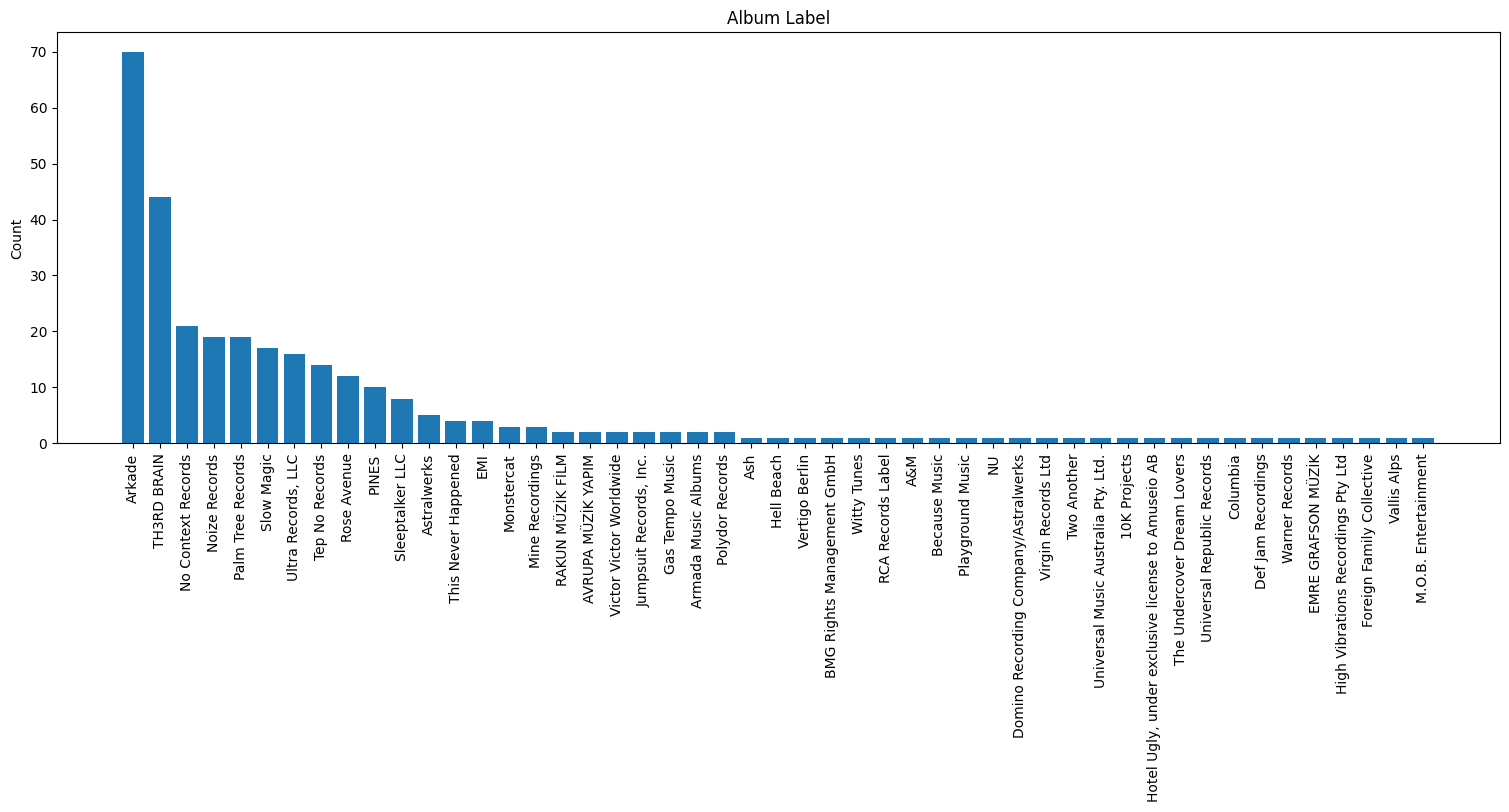


##################################################################

Camelot:

4B     58
9A     46
3A     42
8A     35
12A    23
10A    18
3B     16
6A     14
2B     12
11A    12
1A      9
8B      6
5A      5
2A      4
10B     3
7A      2
5B      2
6B      1
1B      1
Name: Camelot, dtype: int64



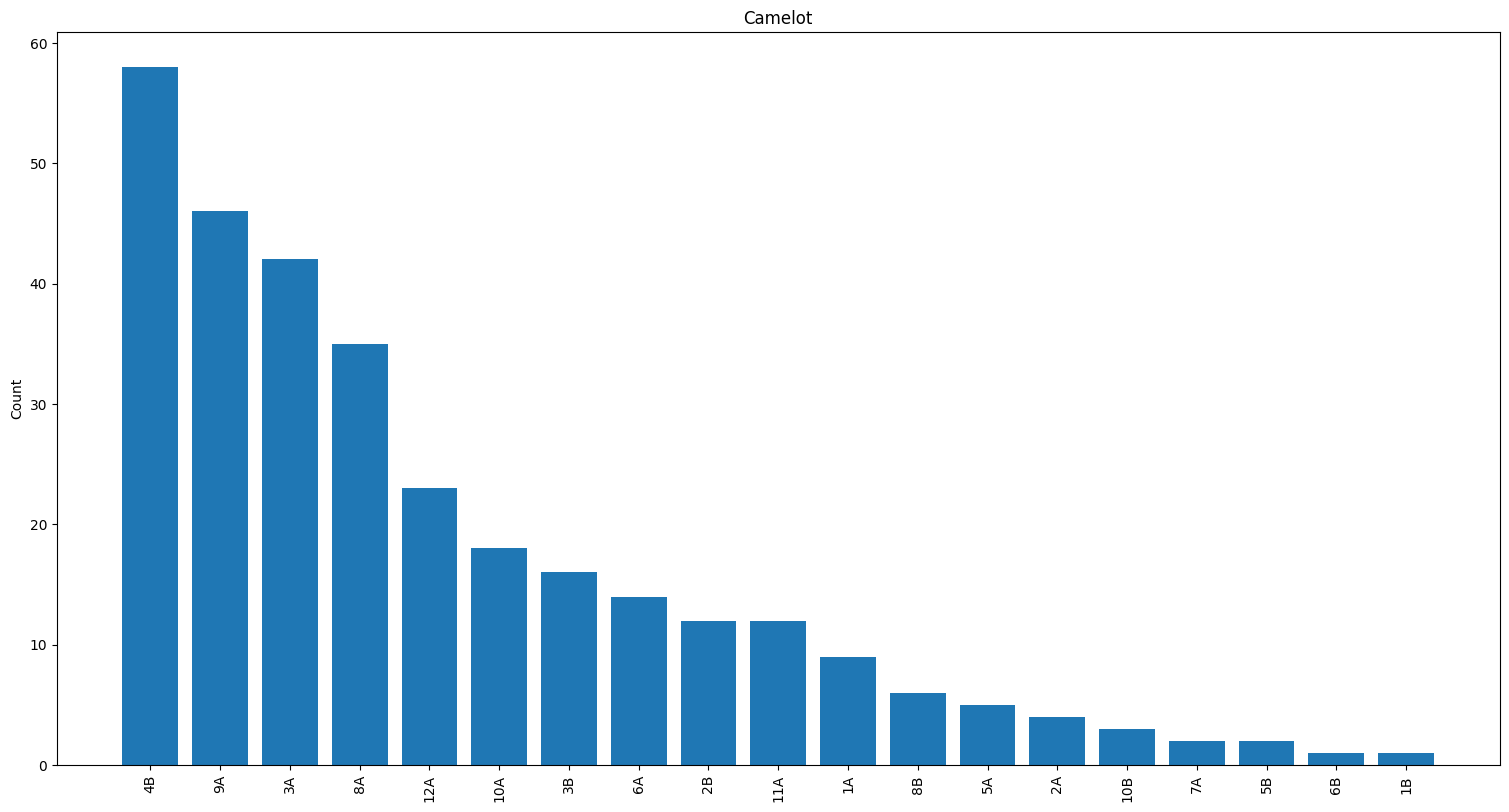


##################################################################

Spotify Track Img:

https://p.scdn.co/mp3-preview/95fcdc1655b6f42055eed61fc72c0f350160d1b7?cid=0dd13485836e45ac9134860ee53d835f    38
https://p.scdn.co/mp3-preview/4ec000a1efa7b161b56cb06cb07b1a6838b7a02d?cid=0dd13485836e45ac9134860ee53d835f    22
https://p.scdn.co/mp3-preview/2424a02c9387e14d31f08aea0f4a8363436cf427?cid=0dd13485836e45ac9134860ee53d835f    21
https://p.scdn.co/mp3-preview/7c6298fa4ad85ffe000194fbf6bb590c70ca2318?cid=0dd13485836e45ac9134860ee53d835f    19
https://p.scdn.co/mp3-preview/12b3e1297b5b2d33d5c7ead27ba63841bf57fa8f?cid=0dd13485836e45ac9134860ee53d835f    19
https://p.scdn.co/mp3-preview/48ed0596f8ded3b5b2f340f2da2ac24ef996365b?cid=0dd13485836e45ac9134860ee53d835f    19
https://p.scdn.co/mp3-preview/57c72f3bde3530ff9242ffe92fd80bd5693921fd?cid=0dd13485836e45ac9134860ee53d835f    17
https://p.scdn.co/mp3-preview/abfe8e1c9736c0d31e4c74c12c299266a66b4e83?cid=0dd13485836e45ac9134860ee53d835f    15

<ipython-input-7-3147f11b6eeb>:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


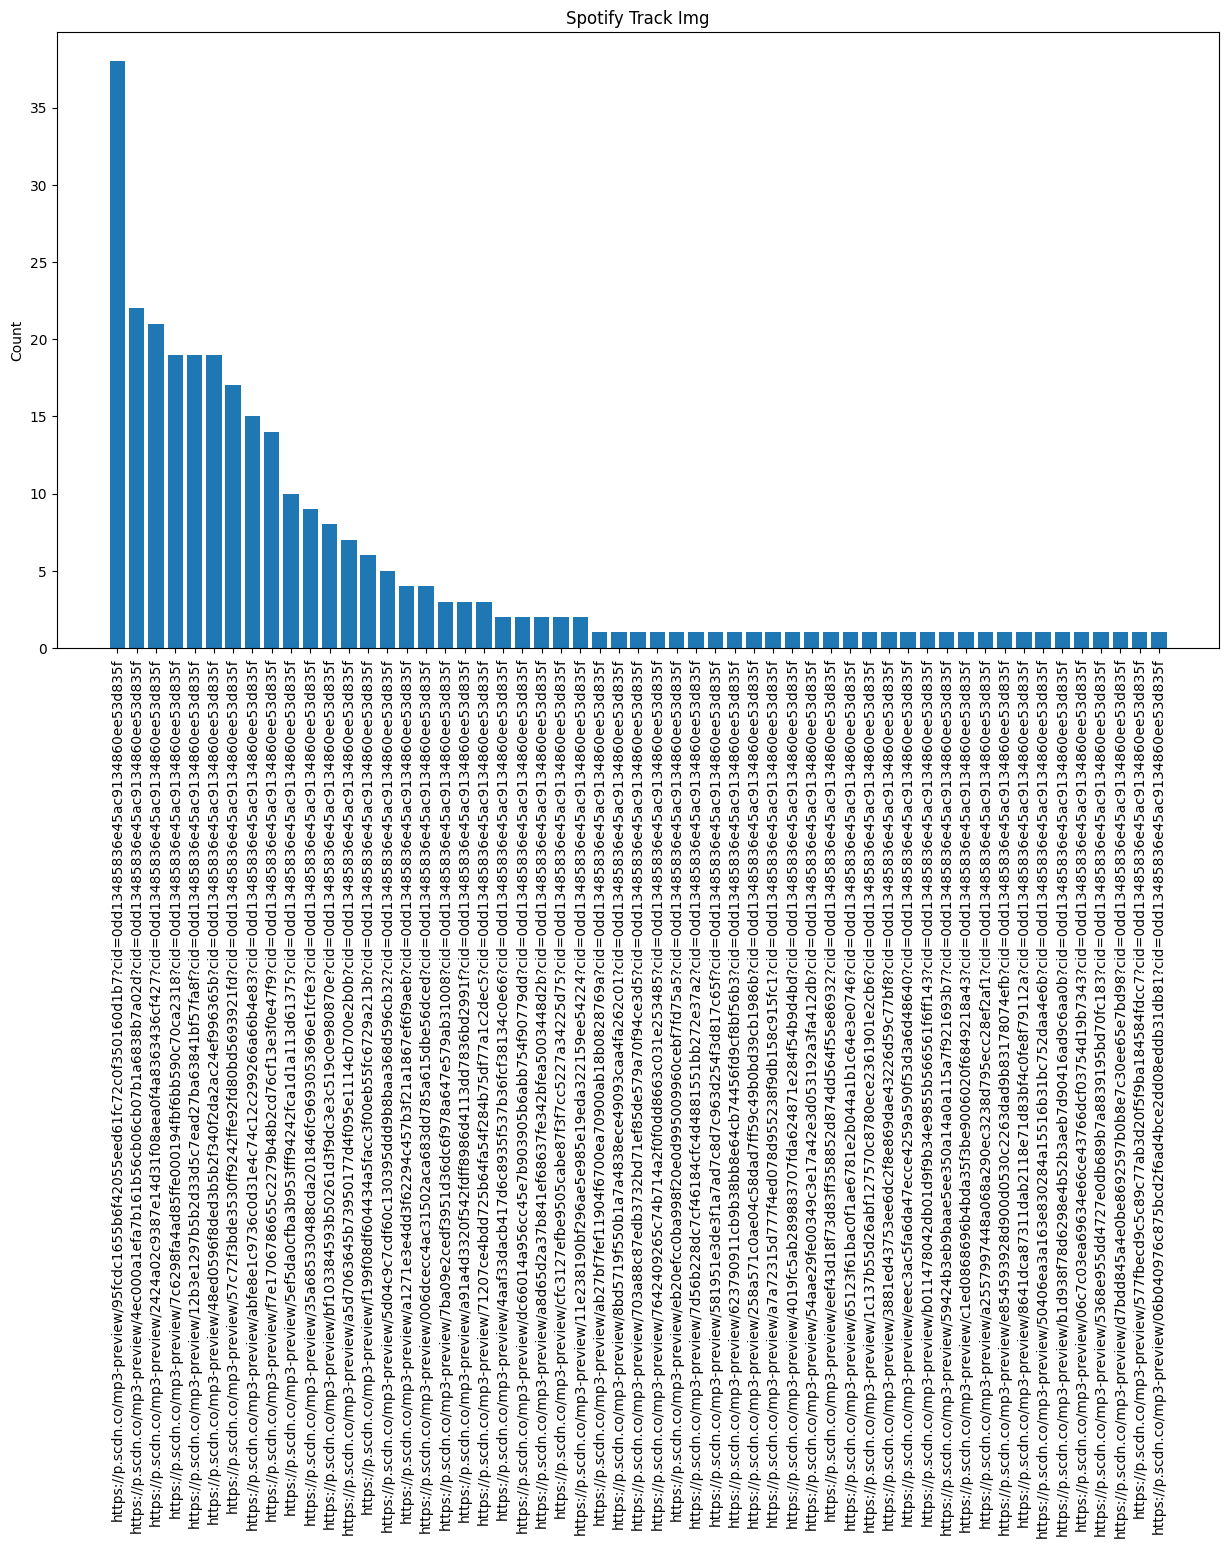


##################################################################

Song Preview:

https://i.scdn.co/image/ab67616d00004851336aea94d7ff4c56b5170d9f    70
https://i.scdn.co/image/ab67616d00004851d60abdde2733eae1292aff5d    21
https://i.scdn.co/image/ab67616d000048512bc531ff011de0135ab243bc    19
https://i.scdn.co/image/ab67616d00004851b00fe6732e17bc298ebc3a1e    19
https://i.scdn.co/image/ab67616d000048516a02bda0e65c127bf623939a    19
                                                                    ..
https://i.scdn.co/image/ab67616d00004851bef074de9ca825bddaeb9f46     1
https://i.scdn.co/image/ab67616d00004851063c048e9ef6bd021b744756     1
https://i.scdn.co/image/ab67616d000048511f6a2a40bb692936879db730     1
https://i.scdn.co/image/ab67616d000048510861dd13c4da8a63f7faffae     1
https://i.scdn.co/image/ab67616d00004851402a0b444b9ea1e40caf53da     1
Name: Song Preview, Length: 62, dtype: int64



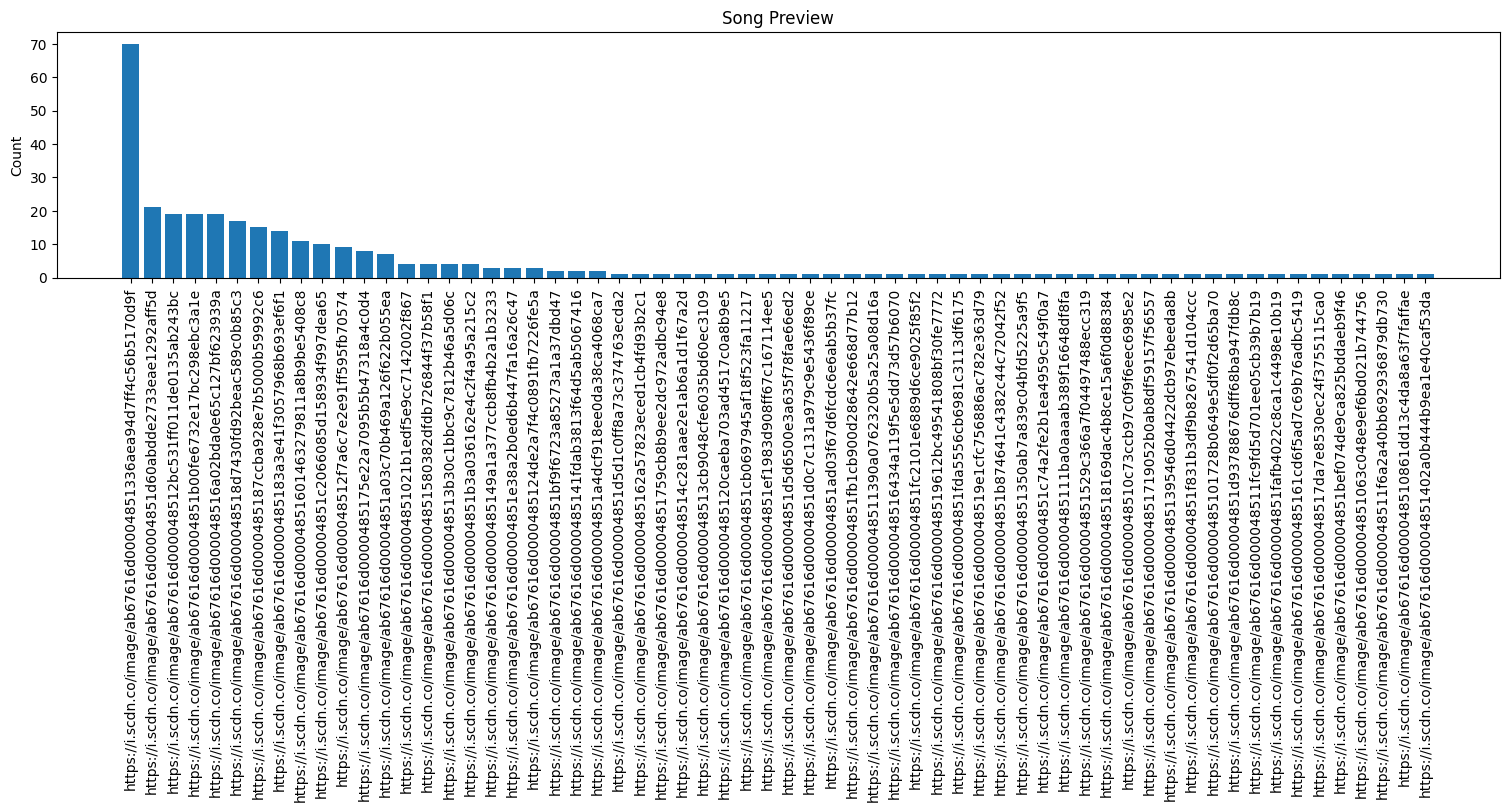


##################################################################



In [ ]:
#For each categorical variable, plot the counts in a bar plot
for variable in categorical_list:

  column = df[variable]
  values = column.value_counts()

  #Print the name and value counts for the current categorical variable
  print("{}:\n\n{}\n".format(variable, values))

  #Plot
  plt.figure(figsize = (15,8))
  plt.bar(values.index, values)
  plt.xticks(values.index, values.index.values, rotation=90)
  plt.tight_layout()
  plt.ylabel("Count")
  plt.title(variable)
  plt.show()


  print("\n##################################################################\n")

In [ ]:
numerical_list = list(df.select_dtypes(include=['int64']).columns)
print("Numerical variables:", numerical_list)

Numerical variables: ['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Time Signature']


In [ ]:
numerical_summary = df.describe()
print(numerical_summary)


                #  Popularity         BPM       Dance      Energy    Acoustic  \
count  309.000000  309.000000  309.000000  309.000000  309.000000  309.000000   
mean   155.000000   37.433657  121.297735   65.197411   76.194175   17.271845   
std     89.344838   12.397880   16.992226   14.378799   14.665131   20.131158   
min      1.000000   19.000000   79.000000   10.000000   20.000000    0.000000   
25%     78.000000   32.000000  120.000000   61.000000   68.000000    5.000000   
50%    155.000000   34.000000  124.000000   66.000000   81.000000    6.000000   
75%    232.000000   39.000000  129.000000   76.000000   87.000000   21.000000   
max    309.000000   91.000000  175.000000   90.000000   98.000000   91.000000   

       Instrumental       Happy      Speech        Live        Loud  \
count    309.000000  309.000000  309.000000  309.000000  309.000000   
mean      20.702265   25.249191    0.582524    7.378641   -7.381877   
std       26.271226   18.420751    3.904354    9.699494  

#:



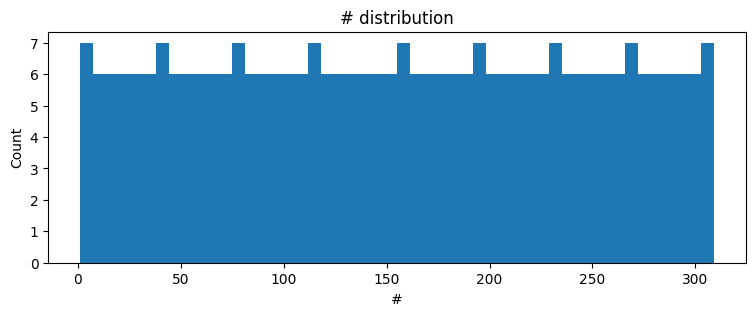


##################################################################

Popularity:



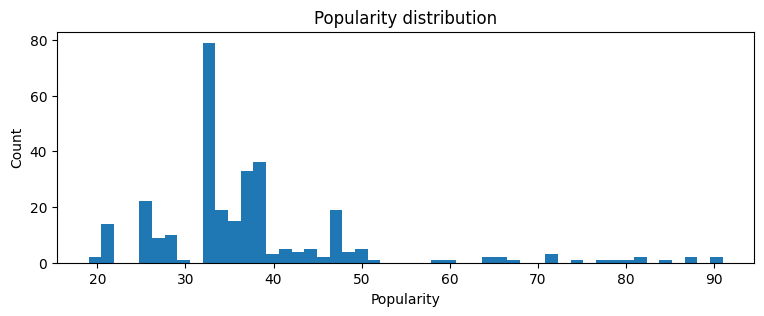


##################################################################

BPM:



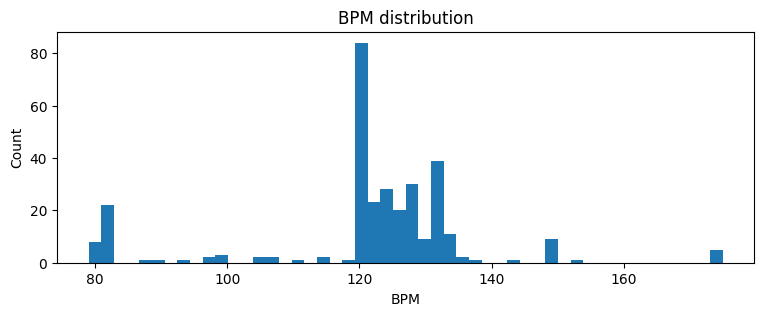


##################################################################

Dance:



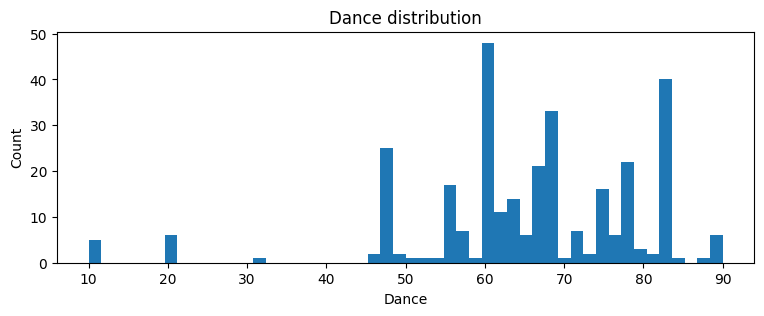


##################################################################

Energy:



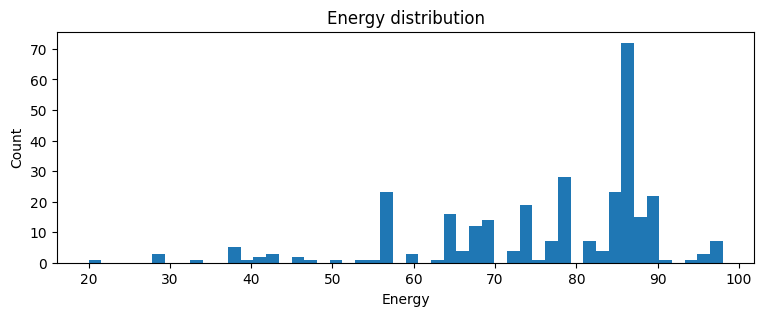


##################################################################

Acoustic:



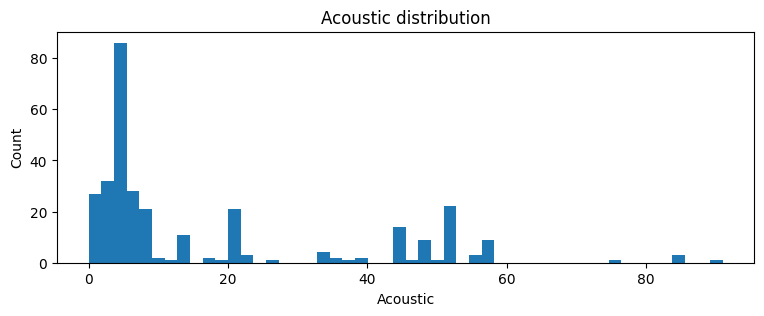


##################################################################

Instrumental:



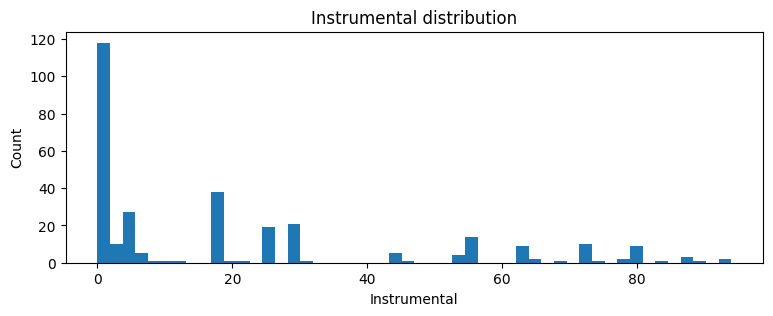


##################################################################

Happy:



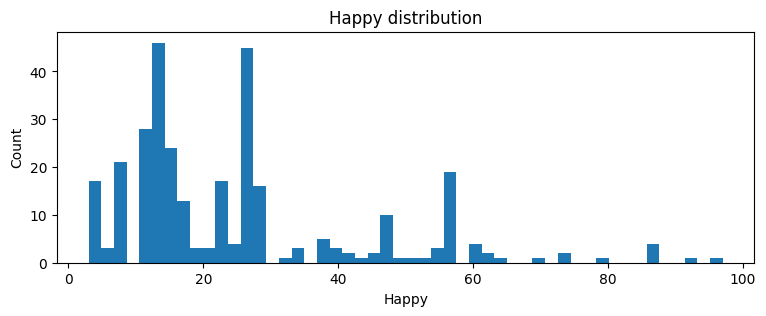


##################################################################

Speech:



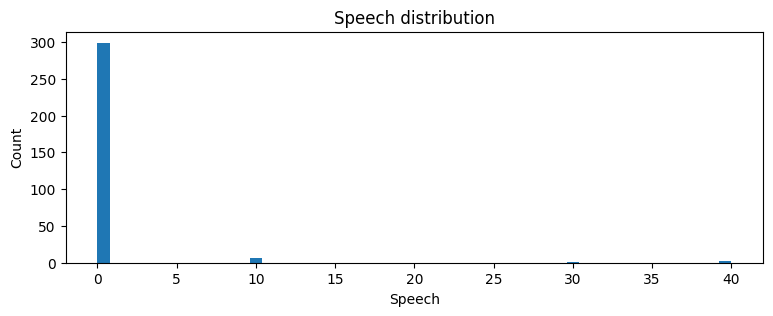


##################################################################

Live:



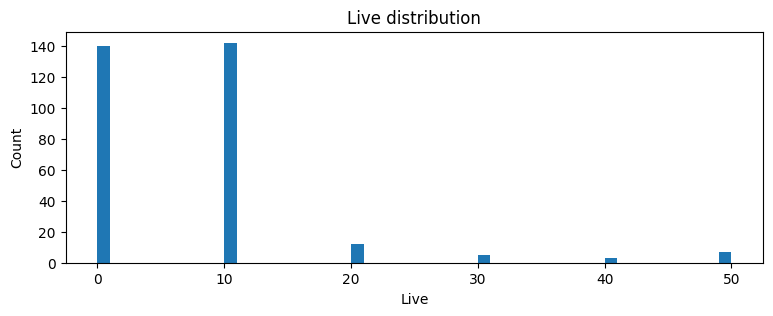


##################################################################

Loud:



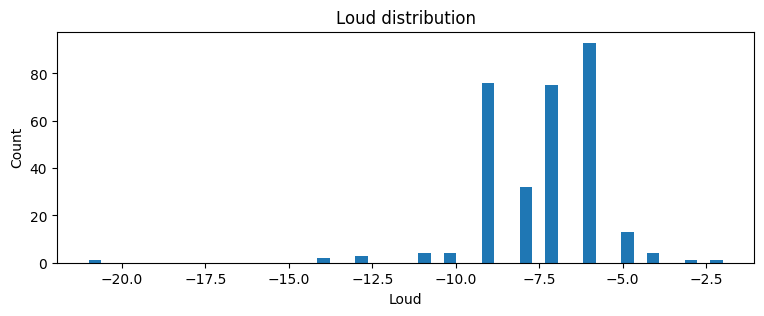


##################################################################

Time Signature:



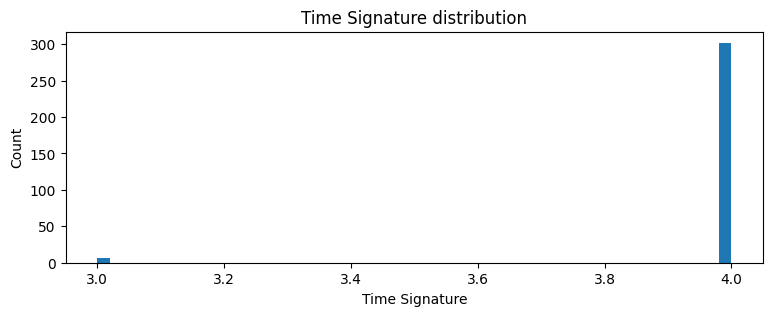


##################################################################



In [ ]:
for variable in numerical_list:

  print("{}:\n".format(variable))

  #Plot a histogram for the variable
  plt.figure(figsize = (9,3))
  plt.hist(df[variable], bins = 50)
  plt.xlabel(variable)
  plt.ylabel("Count")
  plt.title("{} distribution".format(variable))
  plt.show()

  print("\n##################################################################\n")

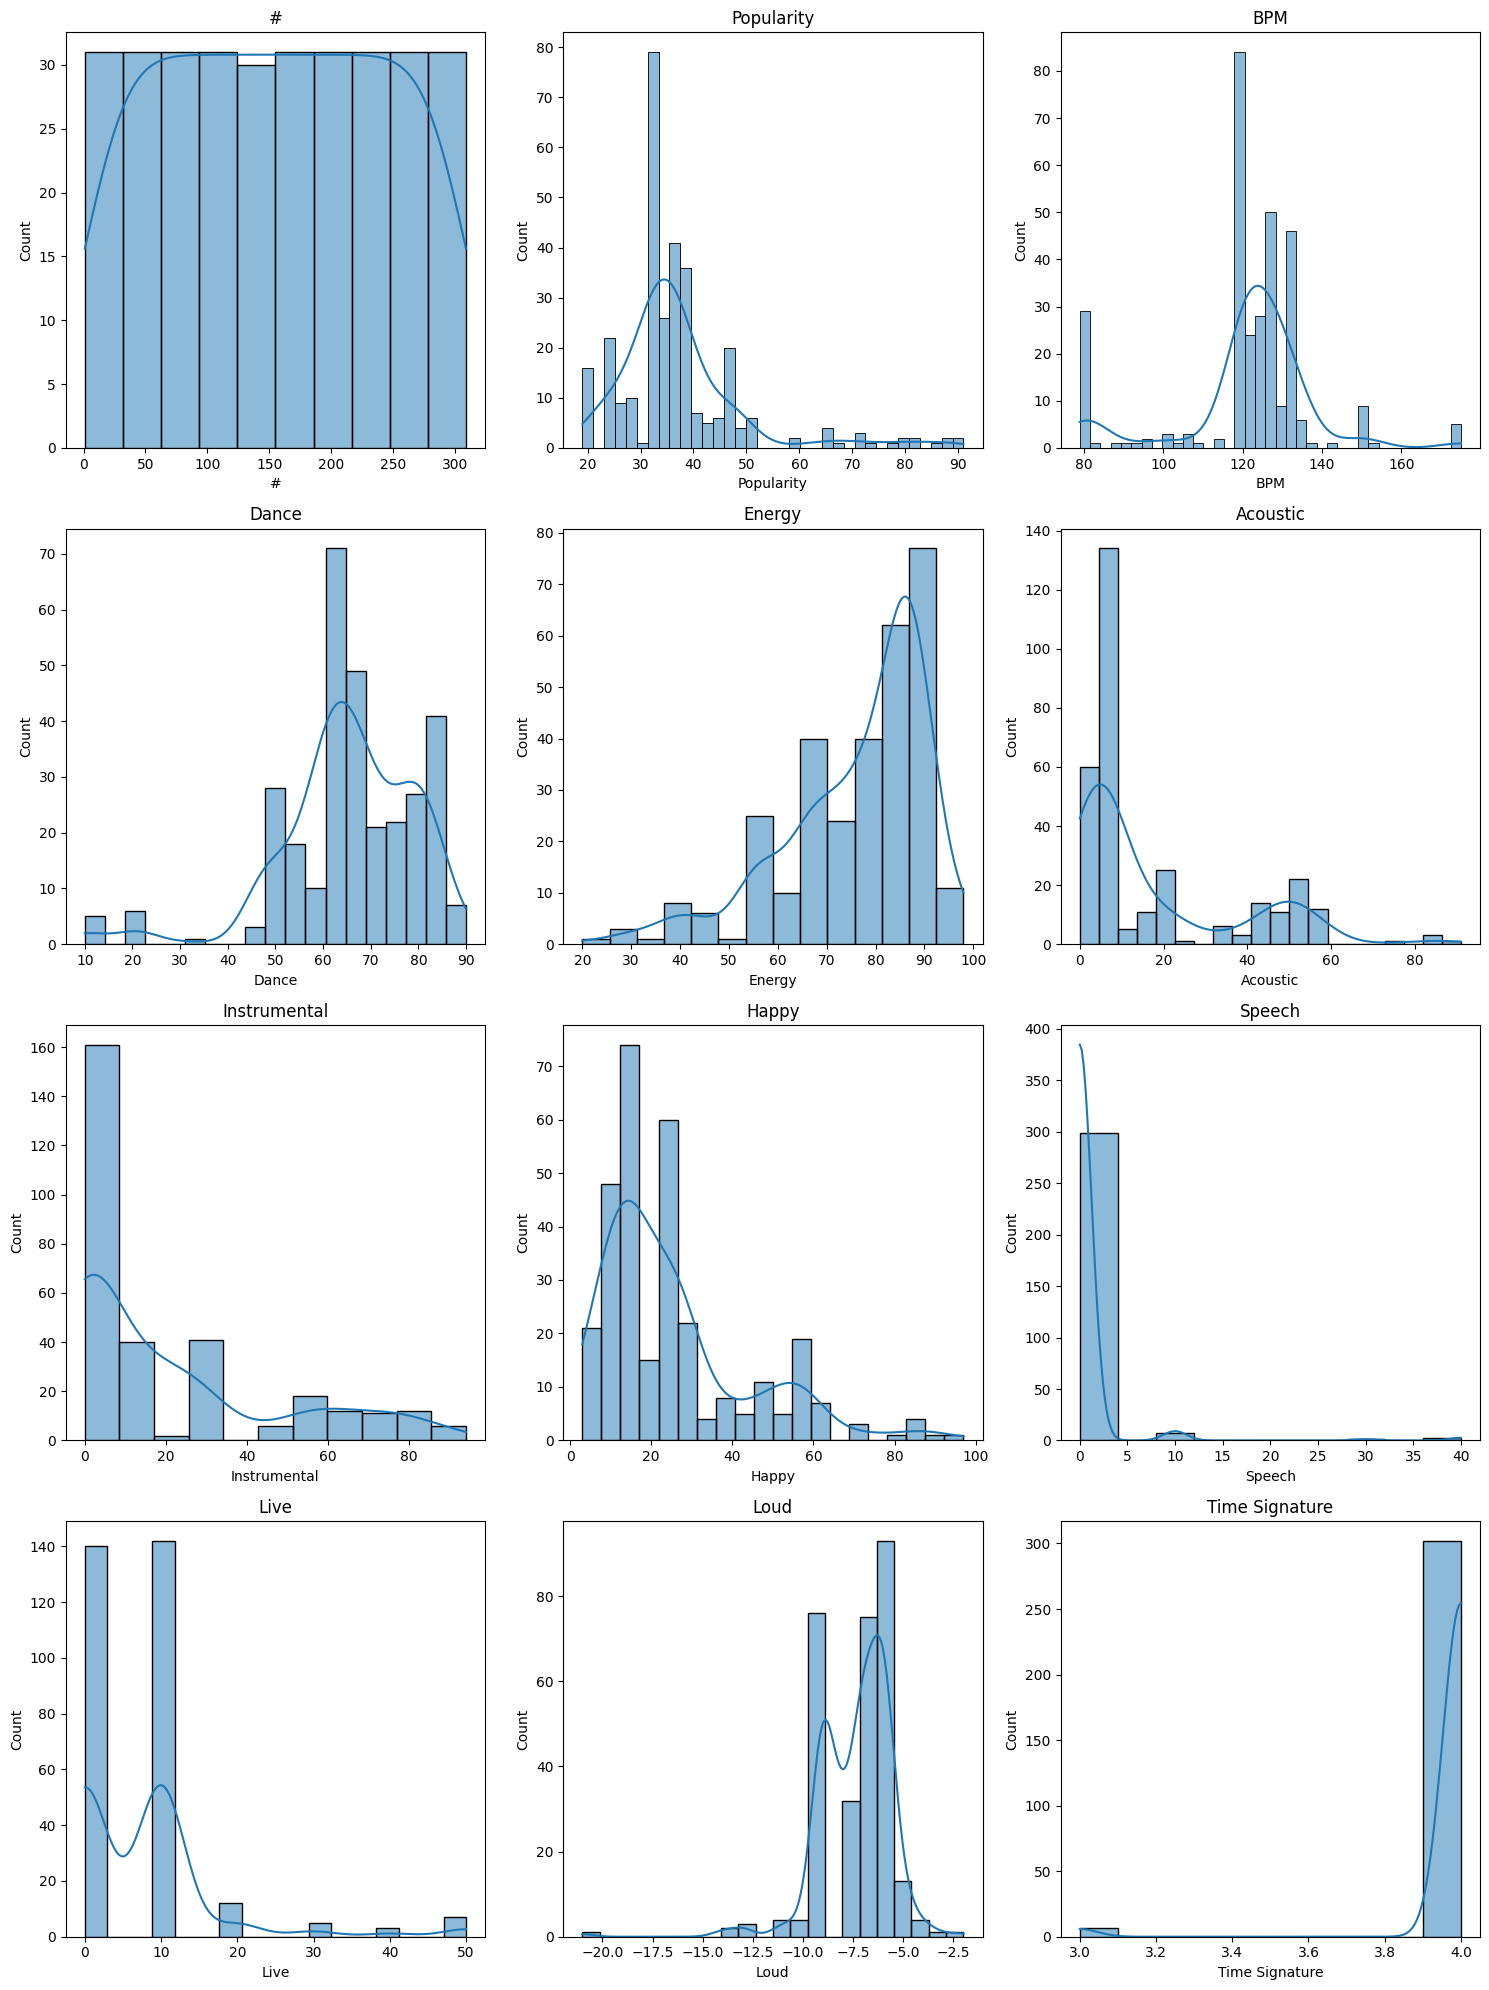

In [ ]:
numerical_list = ['#', 'Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live', 'Loud', 'Time Signature']
n_cols = 3  # Number of columns in each row of the grid


# Calculate the required number of rows to accommodate all plots
n_rows = (len(numerical_list) + n_cols - 1) // n_cols  # Rounds up to the nearest integer

plt.figure(figsize=(15, 5 * n_rows))  # Adjust the figure size as needed

for n in range(len(numerical_list)):
    plt.subplot(n_rows, n_cols, n + 1)
    sns.histplot(df[numerical_list[n]], kde=True)
    plt.title(numerical_list[n])

plt.tight_layout()
plt.show()

We can see that Time Signature, Energy are skewed to the left. Happy, Speech, Live, Acoustic, Instrumental are skewed to the right. Other variables, which represent Popularity, BPM, Dance mostly resemble a normal distribution.

## Data Exploration



In [ ]:
genres_column = df['Genres']

all_genres = [genre.split(',') for genre in genres_column.dropna()]

flat_list = [item.strip() for sublist in all_genres for item in sublist]

genres_series = pd.Series(flat_list)

genre_counts = genres_series.value_counts()

top_10_genres = genre_counts.head(10)
print(top_10_genres)



                             88
edm                          78
electro house                77
pop dance                    77
progressive house            72
progressive electro house    70
vocal house                  70
stutter house                41
gauze pop                    36
vapor twitch                 35
dtype: int64


In [ ]:
genres_column = df['Genres']
popularity_column = df['Popularity']

# Split genres where there are multiple genres in a single entry
# Zip together with the popularity column to maintain the relationship
genre_popularity_pairs = [(genre.split(','), popularity) for genre, popularity in zip(genres_column, popularity_column) if pd.notna(genre)]

all_genres = []
popularity_values = []
for genres, popularity in genre_popularity_pairs:
    for genre in genres:
        all_genres.append(genre.strip())  # Using strip() to remove leading/trailing whitespace
        popularity_values.append(popularity)

genres_df = pd.DataFrame({'Genres': all_genres, 'Popularity': popularity_values})

genre_counts = genres_df['Genres'].value_counts()

popular_genres = genre_counts[genre_counts > 10].index

filtered_df = genres_df[genres_df['Genres'].isin(popular_genres)]

average_popularity = filtered_df.groupby('Genres')['Popularity'].mean()

top_5_genres = average_popularity.nlargest(5)
print("Top 5 Genres based on Average Popularity:")
print(top_5_genres)

print("\nDetailed Information:")
for genre in top_5_genres.index:
    genre_info = filtered_df[filtered_df['Genres'] == genre]
    print(f"\nGenre: {genre}")
    print(f"Total Songs: {len(genre_info)}")
    print(f"Average Popularity: {top_5_genres[genre]:.2f}")
    print(f"Popularity Scores: {genre_info['Popularity'].tolist()}")

Top 5 Genres based on Average Popularity:
Genres
uk dance            46.461538
stutter house       42.560976
edm                 37.435897
australian dance    37.350000
pop dance           37.155844
Name: Popularity, dtype: float64

Detailed Information:

Genre: uk dance
Total Songs: 13
Average Popularity: 46.46
Popularity Scores: [44, 44, 44, 44, 37, 37, 37, 37, 36, 36, 36, 87, 85]

Genre: stutter house
Total Songs: 41
Average Popularity: 42.56
Popularity Scores: [41, 41, 48, 48, 48, 48, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 35, 35, 39, 39, 39, 39, 39, 39, 39, 32, 32, 32, 32, 32, 32, 43]

Genre: edm
Total Songs: 78
Average Popularity: 37.44
Popularity Scores: [40, 50, 39, 35, 43, 36, 36, 36, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 

In [ ]:

popularity_25th = df['Popularity'].quantile(0.25)
popularity_75th = df['Popularity'].quantile(0.75)

df['Popularity_Category'] = pd.cut(df['Popularity'],
                                    bins=[-float('inf'), popularity_25th, popularity_75th, float('inf')],
                                    labels=['Low', 'Medium', 'High'])

df['BPM_Category'] = pd.cut(df['BPM'],
                            bins=[-float('inf'), 100, 130, float('inf')],
                            labels=['Slow', 'Medium', 'Fast'])

print("Popularity Category Counts:")
print(df['Popularity_Category'].value_counts())

print("\nBPM Category Counts:")
print(df['BPM_Category'].value_counts())

Popularity Category Counts:
Medium    142
Low        98
High       69
Name: Popularity_Category, dtype: int64

BPM Category Counts:
Medium    202
Fast       69
Slow       38
Name: BPM_Category, dtype: int64


In [ ]:
def find_most_common_album(csv_file_path):
    df = pd.read_csv(csv_file_path)

    filtered_df = df[(df['Popularity'] == 'High') & (df['BPM'] == 'Fast')]

    loudness_75th_percentile = filtered_df['Loud'].quantile(0.75)

    final_filtered_df = filtered_df[filtered_df['Loud'] > loudness_75th_percentile]


    if not final_filtered_df.empty:
        most_common_album = final_filtered_df['Album'].mode().iloc[0]
        print(f"The most common album among tracks with High popularity, Fast BPM, and above 75th percentile in loudness is: {most_common_album}")
    else:
        return "No album meets the criteria"
csv_file_path = 'study.csv'
most_common_album = find_most_common_album(csv_file_path)
most_common_album


'No album meets the criteria'

In [ ]:
popularity_threshold = df['Popularity'].quantile(0.9)

top_10_percent_df = df[df['Popularity'] >= popularity_threshold]


most_common_camelot = top_10_percent_df['Camelot'].mode().values[0]


print("Most common Camelot code among the top 10% in terms of popularity:", most_common_camelot)


Most common Camelot code among the top 10% in terms of popularity: 3B


##Visualization and Analysis

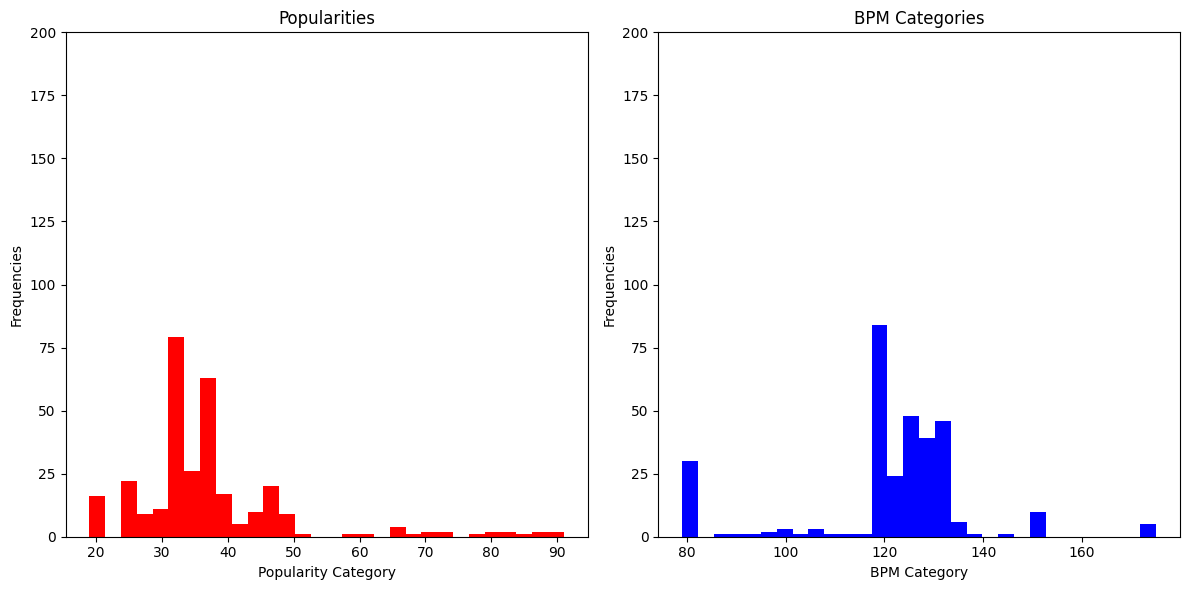

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].hist(df['Popularity'], bins=30, color='red')
axs[0].set_title('Popularities')
axs[0].set_ylabel('Frequencies')
axs[0].set_xlabel('Popularity Category')
axs[0].set_ylim(0, 200)

axs[1].hist(df['BPM'], bins=30, color='blue')
axs[1].set_title('BPM Categories')
axs[1].set_ylabel('Frequencies')
axs[1].set_xlabel('BPM Category')
axs[1].set_ylim(0, 200)

plt.tight_layout()

# Show the plots
plt.show()

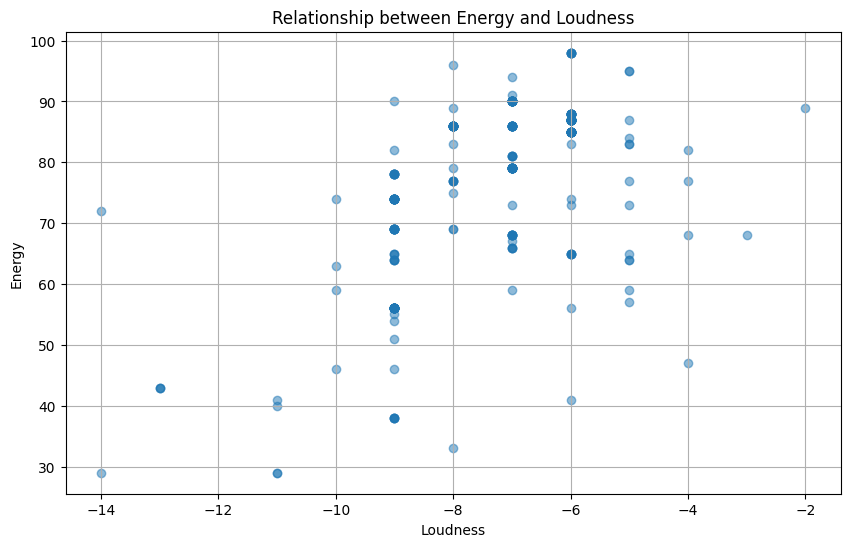

In [ ]:
df_copy = df.copy()

df_copy['Loud'] = pd.to_numeric(df['Loud'].replace(' db', ''), errors='coerce')
df_copy['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')

filtered_data = df_copy[(df_copy['Loud'] >= -20) & (df_copy['Loud'] <= 2) & (df_copy['Energy'] >= 0) & (df_copy['Energy'] <= 100)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data['Loud'], filtered_data['Energy'], alpha=0.5)
plt.title('Relationship between Energy and Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.grid(True)
plt.show()


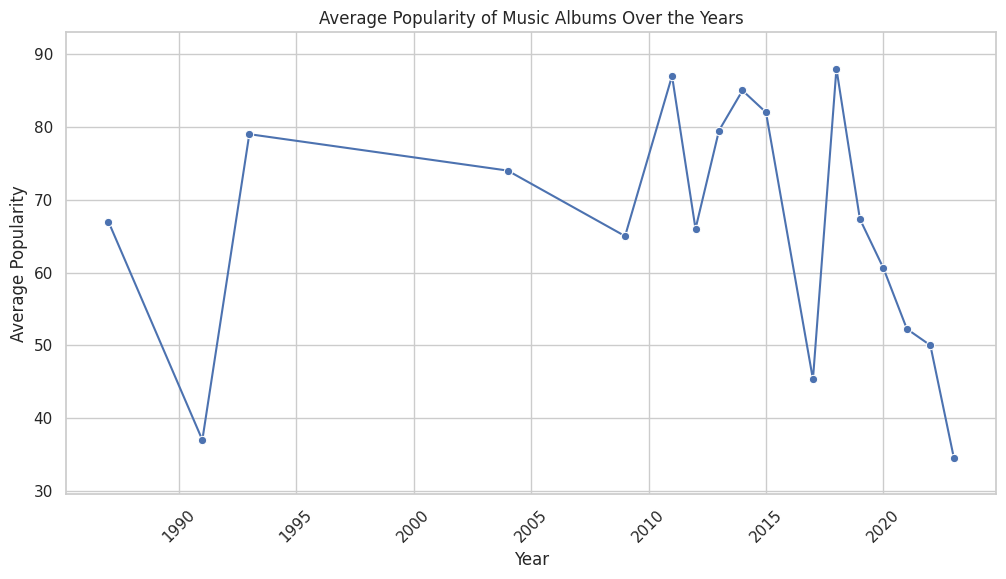

In [ ]:
df['Album Date']=pd.to_datetime(df['Album Date'], errors='coerce', format='%Y-%m-%d')
invalidDates = df[df['Album Date'].isnull()]
#print (invalidDates)

df['Year'] = df['Album Date'].dt.year

average_popularity_by_year = df.groupby('Year')['Popularity'].mean()

plt.figure(figsize=(12,6))
sns.set(style="whitegrid")

sns.lineplot(x=average_popularity_by_year.index, y=average_popularity_by_year.values, marker='o')

plt.title('Average Popularity of Music Albums Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')

plt.xticks(rotation=45)
plt.ylim(average_popularity_by_year.min() -5, average_popularity_by_year.max() +5)

plt.show()


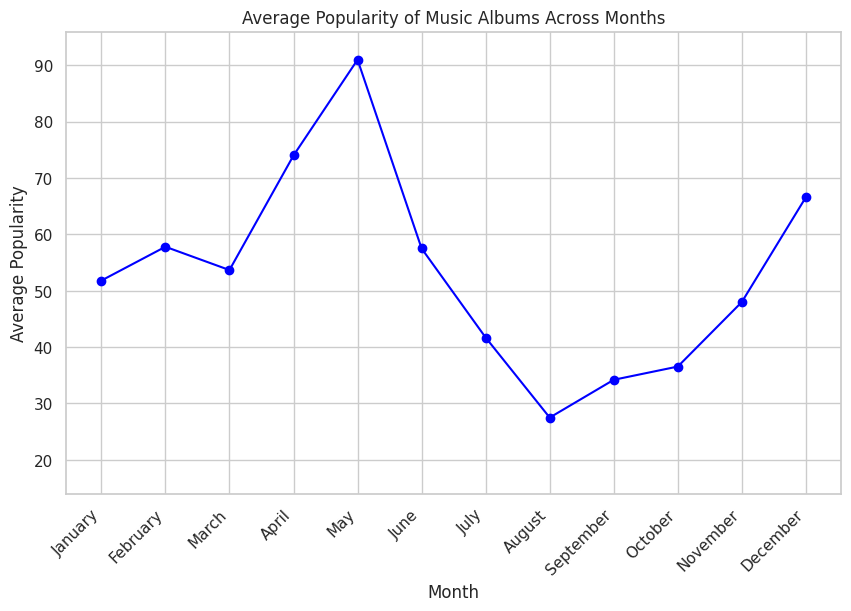

In [ ]:
df['Album Date']=pd.to_datetime(df['Album Date'], errors='coerce', format='%Y-%m-%d')
df['Month']=df['Album Date'].dt.month_name()

month_orders = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

average_popularity_by_month = df.groupby('Month')['Popularity'].mean().reindex(month_orders)

plt.figure(figsize=(10, 6))
plt.plot(average_popularity_by_month.index, average_popularity_by_month.values, marker='o', linestyle='-', color='blue')
plt.title('Average Popularity of Music Albums Across Months')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis
plt.ylim(df['Popularity'].min() - 5, df['Popularity'].max() + 5)
plt.grid(True)

plt.show()


(0.0, 10.0)

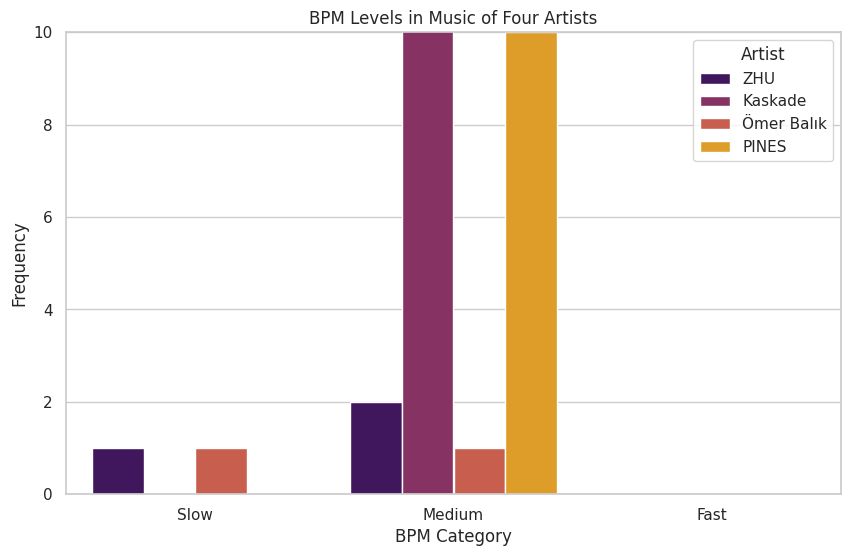

In [ ]:
bpm = [float('-inf'), 100, 130, float('inf')]
bpm_labels = ['Slow', 'Medium', 'Fast']
df['BPM_Category'] = pd.cut(df['BPM'], bins=bpm, labels=bpm_labels) #categorize

selected_artists = ['ZHU', 'Kaskade', 'Ömer Balık', 'PINES']
df_filtered = df[df['Artist'].isin(selected_artists)]

desired_order = ['ZHU', 'Kaskade', 'Ömer Balık', 'PINES']
#print(df_filtered['BPM_Category'])

bpm_order =  ['Slow', 'Medium', 'Fast']


plt.figure(figsize=(10, 6))
sns.countplot(x='BPM_Category', hue='Artist', data=df_filtered, order=bpm_order, palette='inferno', hue_order=desired_order)
plt.title('BPM Levels in Music of Four Artists')
plt.xlabel('BPM Category')
plt.ylabel('Frequency')
plt.ylim(0, 10)



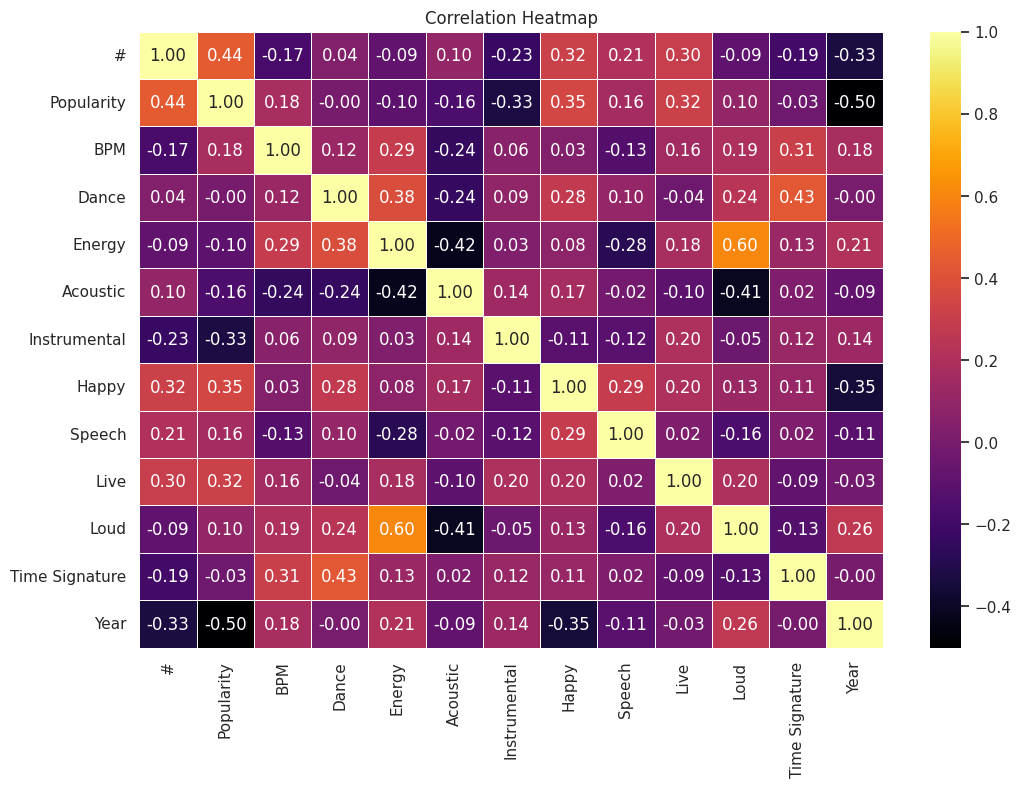

In [ ]:
numerical_columns = df.select_dtypes(include='number')
df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live']] = df[['Popularity', 'BPM', 'Dance', 'Energy', 'Acoustic', 'Instrumental', 'Happy', 'Speech', 'Live']].apply(pd.to_numeric, errors='coerce')

df['Loud'] = pd.to_numeric(df['Loud'].replace(' db', ''), errors='coerce')


correlation_matrix = df.select_dtypes(include = 'number').corr()


plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)

plt.title('Correlation Heatmap')

plt.show()



In [ ]:
df.isna().sum()

#                       0
Song                    0
Artist                  0
Popularity              0
BPM                     0
Genres                 18
Parent Genres          18
Album                   0
Album Date              1
Time                    0
Dance                   0
Energy                  0
Acoustic                0
Instrumental            0
Happy                   0
Speech                  0
Live                    0
Loud                    0
Key                     0
Time Signature          0
Added At                0
Spotify Track Id        0
Album Label             0
Camelot                 0
Spotify Track Img      23
Song Preview            0
Popularity_Category     0
BPM_Category            0
Year                    1
Month                   1
dtype: int64

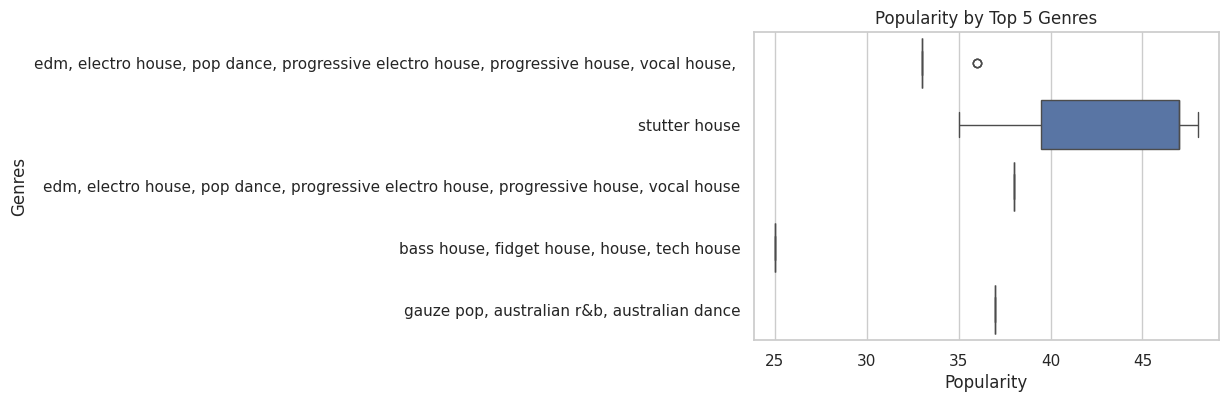

In [40]:
# Plot 1: Boxplot for Popularity by Genres
plt.figure(figsize=(6, 4))
top_genres = df['Genres'].value_counts().head(5).index
sns.boxplot(x='Popularity', y='Genres', data=df[df['Genres'].isin(top_genres)])
plt.title('Popularity by Top 5 Genres')
plt.show()

<ipython-input-41-aabc5b1afc89>:4: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x='Loud', y='Dance', hue='Live', data=df, palette=['blue', 'orange'])


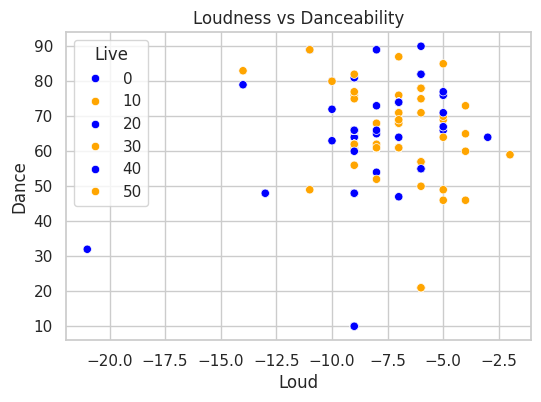

In [41]:
# Plot 2: Scatter plot for Loudness vs Danceability
plt.figure(figsize=(6, 4))
# Assuming 'Live' is a binary column with values indicating live or studio recording
sns.scatterplot(x='Loud', y='Dance', hue='Live', data=df, palette=['blue', 'orange'])
plt.title('Loudness vs Danceability')
plt.show()

In [3]:
df1 = pd.read_csv('Updated_My_Favs_with_Release_Year.csv')


In [82]:
df1.isna().sum()


#                    0
Song                 0
Artist               0
Popularity           0
BPM                  0
Genres               2
Parent Genres        2
Album                0
Album Date           0
Time                 0
Dance                0
Energy               0
Acoustic             0
Instrumental         0
Happy                0
Speech               0
Live                 0
Loud                 0
Key                  0
Time Signature       0
Added At             0
Spotify Track Id     0
Album Label          0
Camelot              0
Spotify Track Img    9
Song Preview         0
duration_ms          0
release_year         0
dtype: int64

In [83]:
df2 = df1.copy()
df2['duration_ms'].head()

0    295637
1    147771
2    188500
3    247129
4    210044
Name: duration_ms, dtype: int64

In [84]:
df2['duration_ms'] = df2['duration_ms']/1000
df2.rename({'duration_ms':'duration_in_seconds'},axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    50 non-null     int64  
 1   Song                 50 non-null     object 
 2   Artist               50 non-null     object 
 3   Popularity           50 non-null     int64  
 4   BPM                  50 non-null     int64  
 5   Genres               48 non-null     object 
 6   Parent Genres        48 non-null     object 
 7   Album                50 non-null     object 
 8   Album Date           50 non-null     object 
 9   Time                 50 non-null     object 
 10  Dance                50 non-null     int64  
 11  Energy               50 non-null     int64  
 12  Acoustic             50 non-null     int64  
 13  Instrumental         50 non-null     int64  
 14  Happy                50 non-null     int64  
 15  Speech               50 non-null     int64

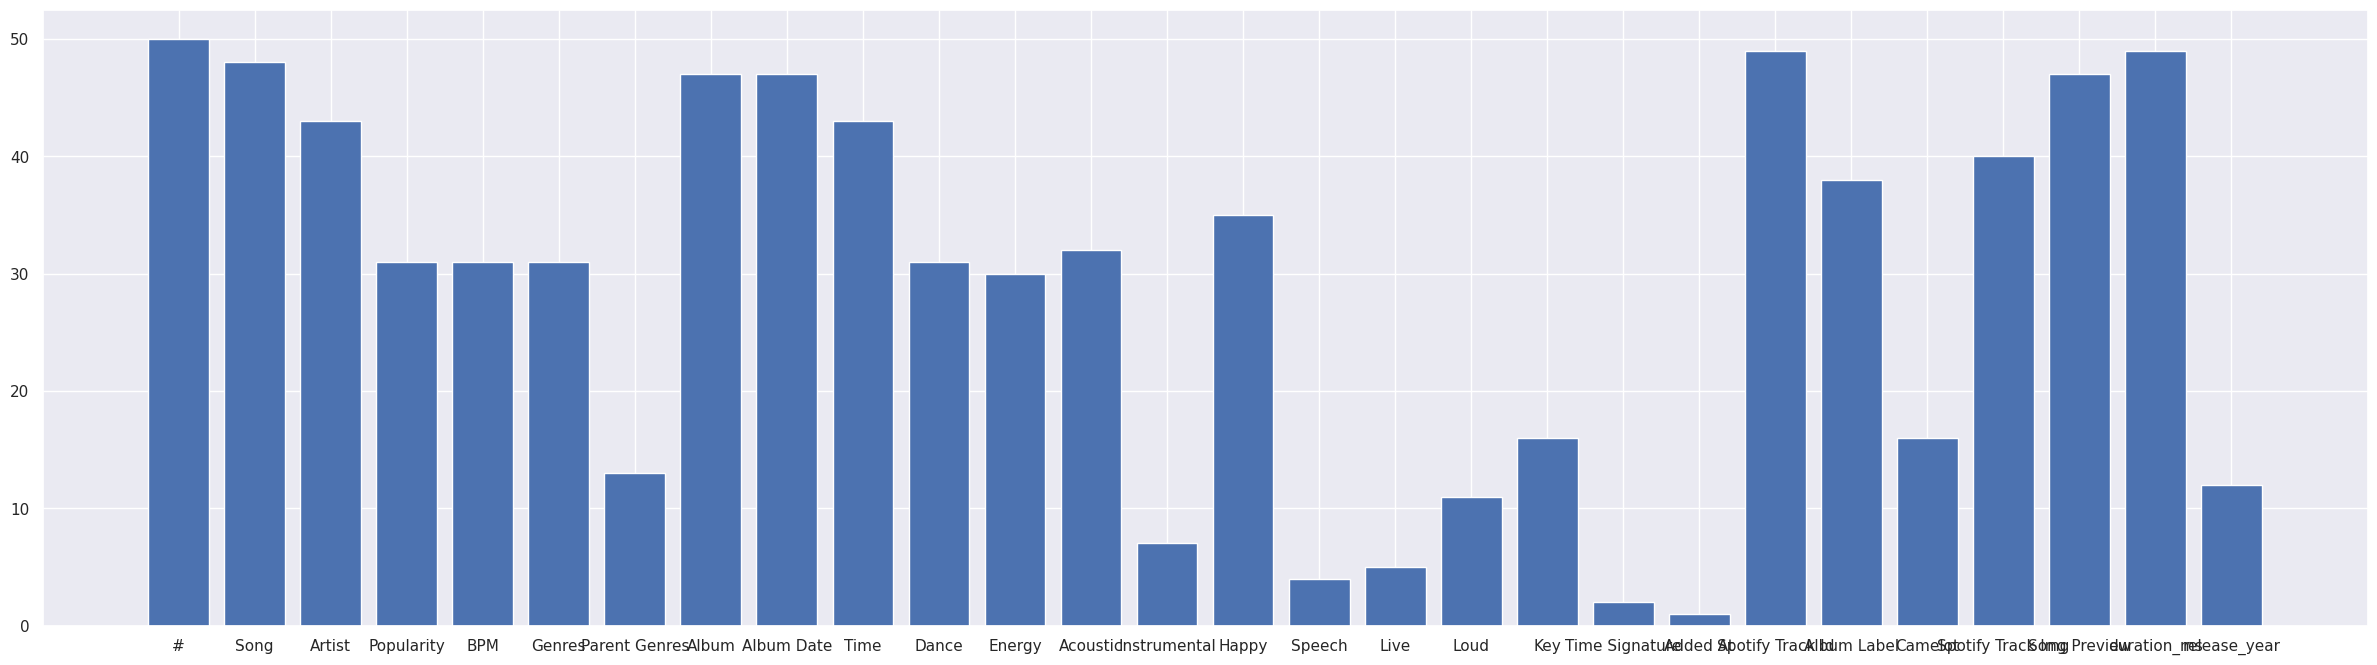

In [85]:
from collections import defaultdict

frequency=defaultdict(lambda:0)

for i in df1:
    frequency[i]=df1[i].nunique()



frequency


fig,ax=plt.subplots(figsize=(30, 8))

ax.bar(frequency.keys(),frequency.values())

plt.show()

In [86]:
frequency


defaultdict(<function __main__.<lambda>()>,
            {'#': 50,
             'Song': 48,
             'Artist': 43,
             'Popularity': 31,
             'BPM': 31,
             'Genres': 31,
             'Parent Genres': 13,
             'Album': 47,
             'Album Date': 47,
             'Time': 43,
             'Dance': 31,
             'Energy': 30,
             'Acoustic': 32,
             'Instrumental': 7,
             'Happy': 35,
             'Speech': 4,
             'Live': 5,
             'Loud': 11,
             'Key': 16,
             'Time Signature': 2,
             'Added At': 1,
             'Spotify Track Id': 49,
             'Album Label': 38,
             'Camelot': 16,
             'Spotify Track Img': 40,
             'Song Preview': 47,
             'duration_ms': 49,
             'release_year': 12})

In [87]:
df2


#                                               Song  \
0    1                                  Unutulacak Dünler   
1    2                                             Tekrar   
2    3                                  Seni Dert Etmeler   
3    4                                         Kelebekler   
4    5                                                 25   
5    6                                       Olamam İflah   
6    7                                              Neden   
7    8                                       Al Aramızdan   
8    9                                          PAPARAZZI   
9   10                                  Gökyüzünü Tutamam   
10  11                                               Baba   
11  12                                            Geceler   
12  13                                              ELMAS   
13  14                                           Bul Beni   
14  15                                  We Are The People   
15  16  Take What You Want (feat. Ozzy Osbourne & Trav...   
16  17                                        Heveslenmem   
17  18                               sana dönmem imkansız   
18  19                                     Pusulam Rüzgar   
19  20                                             Makina   
20  21                          Sakladığın Bir Şeyler Var   
21  22                                        Diğer Yarım   
22  23                                             Mayrig   
23  24                                            Link UP   
24  25                                    Beyaz Skandalım   
25  26                               Ne Zamandır Sendeyim   
26  27                                Seni Gördüm Rüyamda   
27  28                                       Antidepresan   
28  29                                              ELMAS   
29  30                                  Kalbin bana kaldı   
30  31                                        Unutulanlar   
31  32                                          Son Bakış   
32  33                                    GECELERİN DERDİ   
33  34                                     MINI TERORISTA   
34  35                                           FESTİVAL   
35  36                                              Melek   
36  37                             Gamzedeyim Deva Bulmam   
37  38                                             Bodrum   
38  39                                    Beyaz Skandalım   
39  40                                                Kül   
40  41                                            Kadınım   
41  42                                            Sür Eve   
42  43                                            Детство   
43  44                               lovely (with Khalid)   
44  45                                    Peygamber Sabrı   
45  46                 Dancin (feat. Luvli) - Krono Remix   
46  47                                       Toz Taneleri   
47  48                                        Eskisi Gibi   
48  49                               Hollywood's Bleeding   
49  50                                       Yalnız Çiçek   

                                    Artist  Popularity  BPM  \
0                                 Gazapizm          64  180   
1                             Karya Çandar          26   95   
2                                 Madrigal          74   88   
3                                 Madrigal          61   82   
4                                   Ati242          72  120   
5                         Lil Zey,Khontkar          54   59   
6                                Mudi,Enes          30   83   
7                                     KÖFN          71   94   
8                                      UZI          69  110   
9                                  Can Koç          69  176   
10                              Diyar Pala          48  152   
11                                   Ezhel          70  130   
12                         Luciano,Lil Zey          53  140   
13         

In [88]:
df1.Popularity.unique()


array([64, 26, 74, 61, 72, 54, 30, 71, 69, 48, 70, 53, 63, 56, 78, 59, 51,
       67, 66, 75, 44, 68, 55, 62, 65, 80, 58, 40, 50, 91, 79])

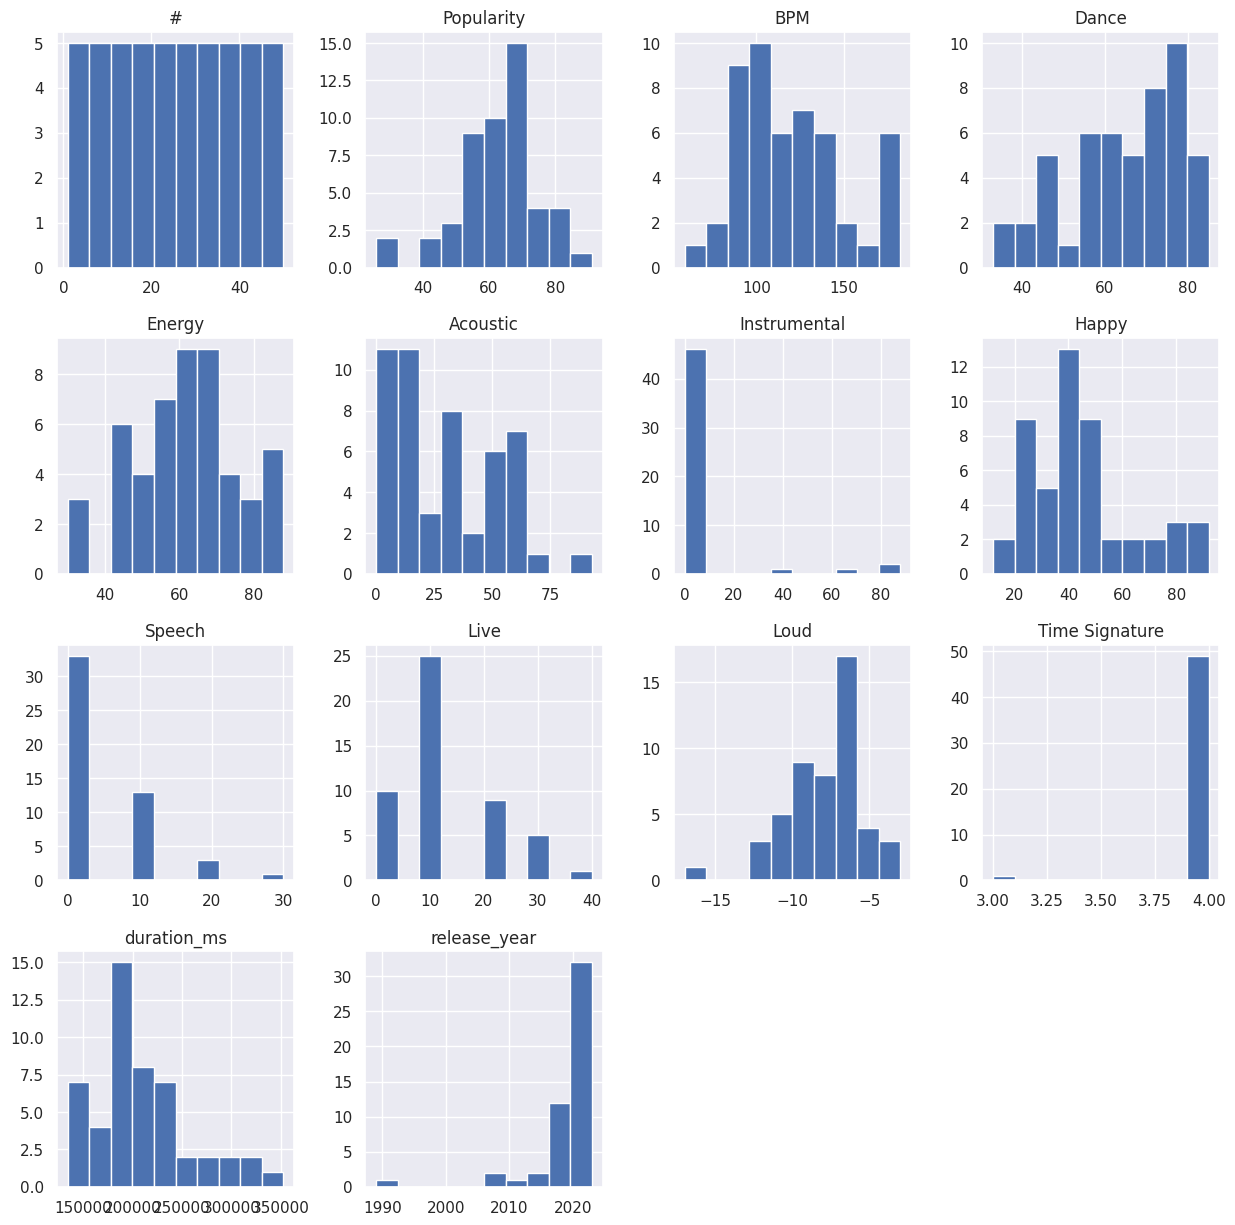

In [89]:
df1.hist(figsize=(15,15))
plt.show()

<ipython-input-90-2eaffe6b4cbe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

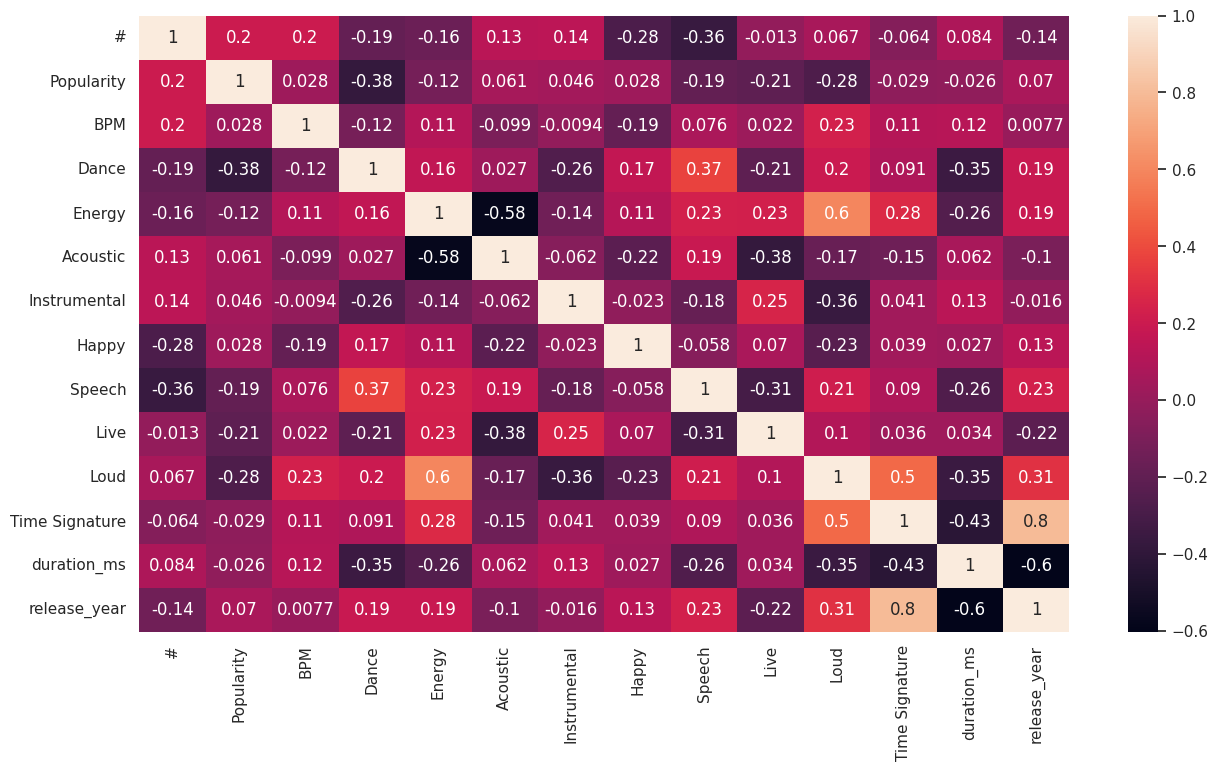

In [90]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True)

<ipython-input-91-a662d4089efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x=g_pn.index, y=g_pn, palette='rocket')  # Updated line


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Beyaz Skandalım'),
  Text(1, 0, 'ELMAS'),
  Text(2, 0, 'lovely (with Khalid)'),
  Text(3, 0, 'MINI TERORISTA'),
  Text(4, 0, 'Dancin (feat. Luvli) - Krono Remix'),
  Text(5, 0, "Hollywood's Bleeding"),
  Text(6, 0, 'Take What You Want (feat. Ozzy Osbourne & Travis Scott)'),
  Text(7, 0, 'Sakladığın Bir Şeyler Var'),
  Text(8, 0, 'Seni Dert Etmeler'),
  Text(9, 0, '25'),
  Text(10, 0, 'Antidepresan'),
  Text(11, 0, 'Diğer Yarım'),
  Text(12, 0, 'Al Aramızdan'),
  Text(13, 0, 'Geceler'),
  Text(14, 0, 'Детство'),
  Text(15, 0, 'Gökyüzünü Tutamam'),
  Text(16, 0, 'PAPARAZZI'),
  Text(17, 0, 'Kül'),
  Text(18, 0, 'Gamzedeyim Deva Bulmam'),
  Text(19, 0, 'Pusulam Rüzgar')])

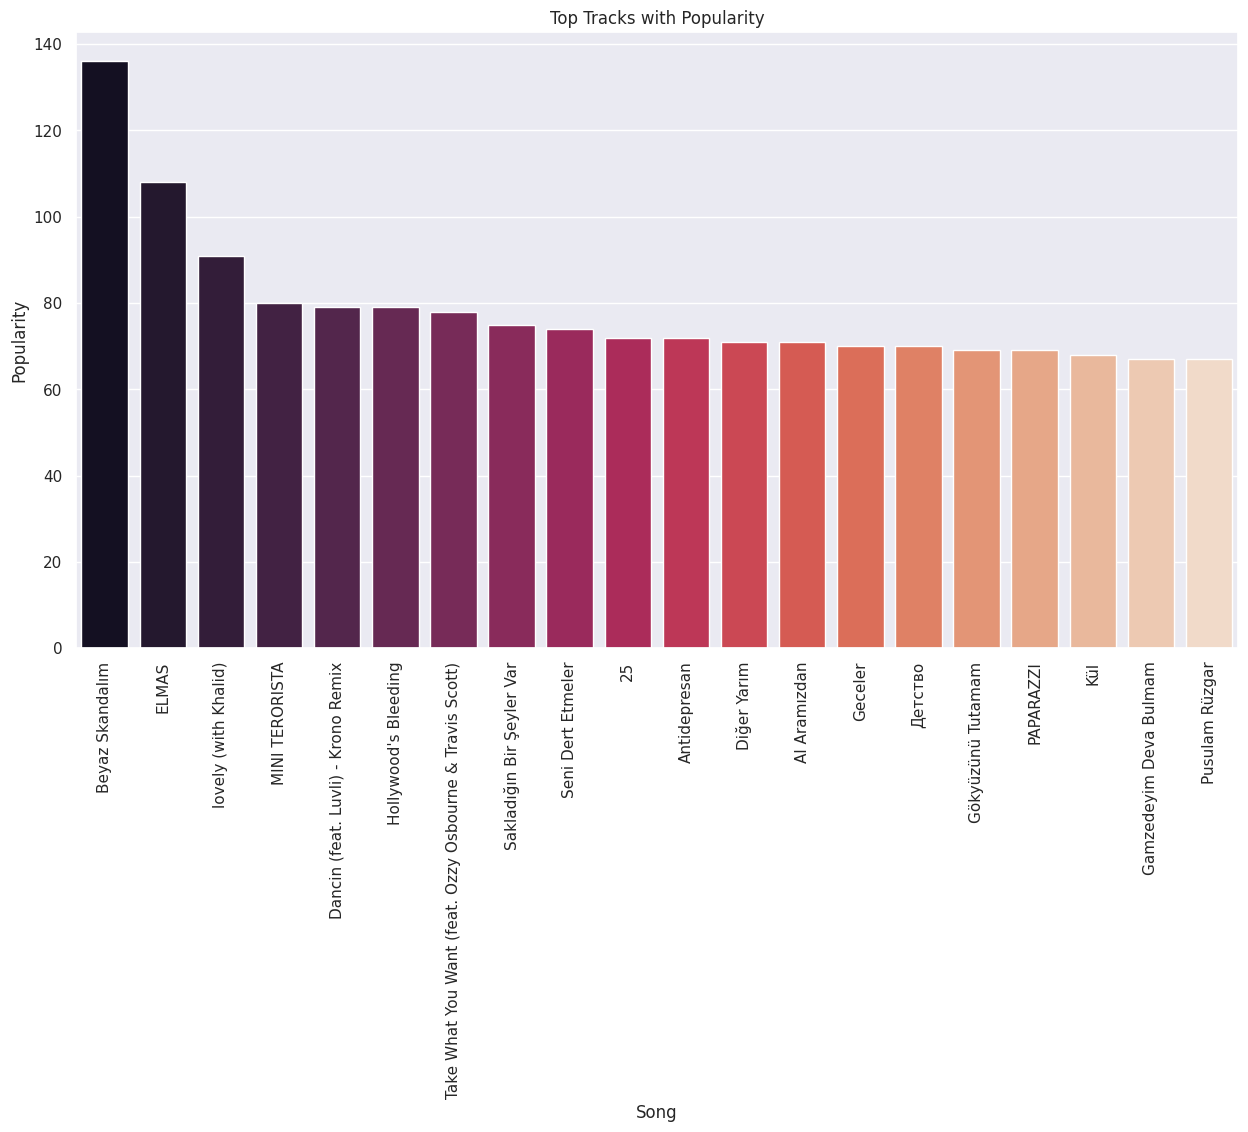

In [91]:
g_pn = df2.groupby("Song")['Popularity'].sum().sort_values(ascending=False)[:20]
sns.set(rc={'figure.figsize':(15,8)})
axis = sns.barplot(x=g_pn.index, y=g_pn, palette='rocket')  # Updated line
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
plt.xticks(rotation = 90)


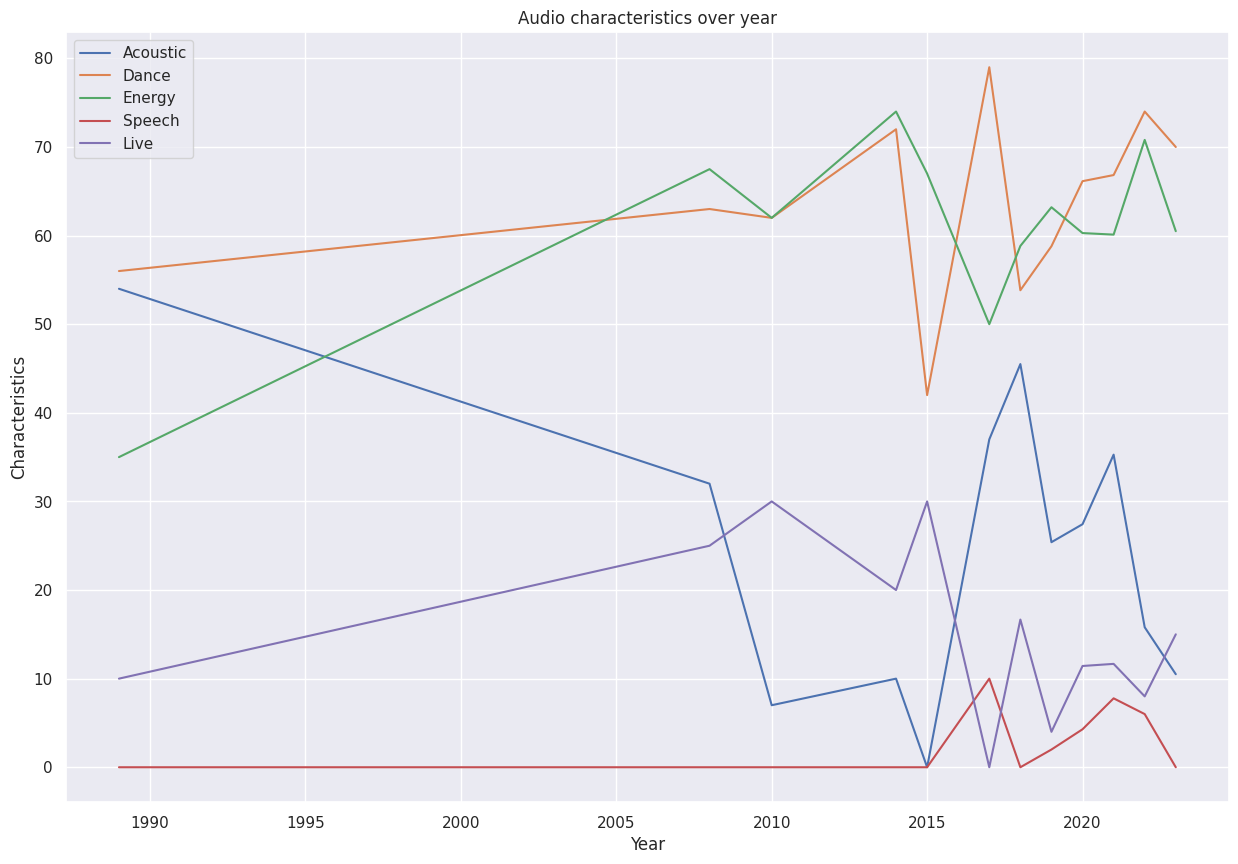

In [108]:

columns = ["Acoustic", "Dance", "Energy", "Speech", "Live"]

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column and create a line plot
for c in columns:
    # Group by 'release_year' and calculate the mean for each column
    x = df2.groupby('release_year')[c].mean()
    # Corrected lineplot usage with named x and y arguments
    sns.lineplot(x=x.index, y=x.values, label=c)

# Set the title, and labels for x and y axes
plt.title('Audio characteristics over year')
plt.xlabel('Year')
plt.ylabel('Characteristics')

# Display the plot
plt.show()


In [109]:
df2['release_year'].describe()


count      50.000000
mean     2018.760000
std         5.396749
min      1989.000000
25%      2018.250000
50%      2020.500000
75%      2021.000000
max      2023.000000
Name: release_year, dtype: float64

In [118]:
bins = [1920,1960,2000,2020]
df2['year_bins'] = pd.cut(df2['release_year'],bins,labels=['20s-60s','60s-2000','2000-2020'])
df2['year_bins'].head(10)

0    2000-2020
1          NaN
2    2000-2020
3    2000-2020
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
Name: year_bins, dtype: category
Categories (3, object): ['20s-60s' < '60s-2000' < '2000-2020']

<ipython-input-120-16f40f09567c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(x=g_yp.index, y=g_yp, palette='autumn_r')  # Corrected to use named arguments


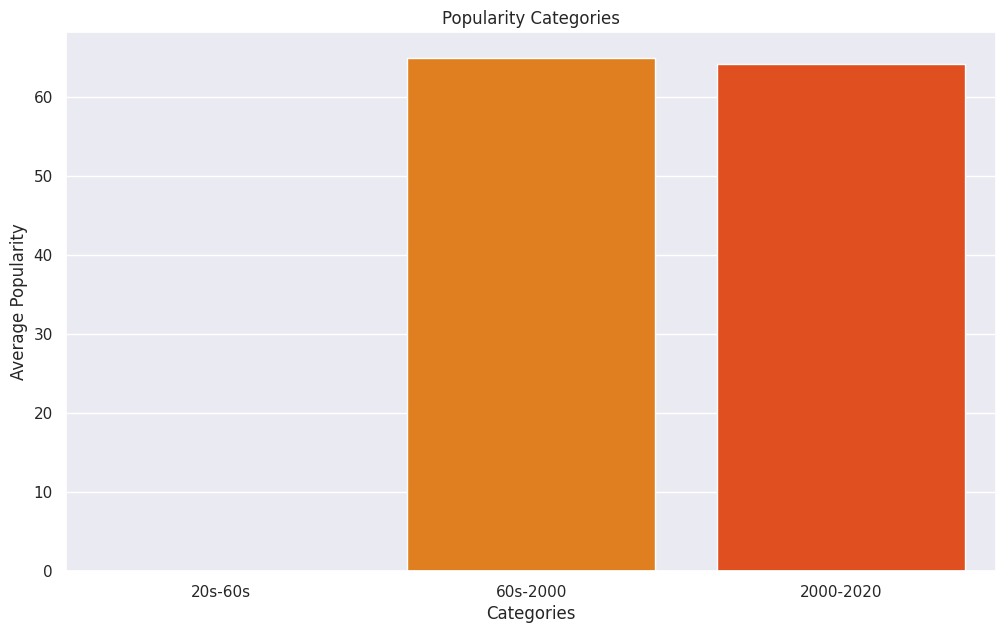

In [120]:
g_yp = df2.groupby('year_bins')['Popularity'].mean().sort_values(ascending=False)[:20]
sns.set(rc={'figure.figsize':(12,7)})
axis = sns.barplot(x=g_yp.index, y=g_yp, palette='autumn_r')  # Corrected to use named arguments
axis.set_title('Popularity Categories')
axis.set_xlabel('Categories')
axis.set_ylabel('Average Popularity')
plt.show()


##Machine Learning Models

In [121]:
np.random.seed(6)
popular = np.random.choice(a= df1['Popularity'], size=500)
print("sample mean",popular.mean())
print("population mean",df1['Popularity'].mean())

print("standard deviation",df1['Popularity'].std())

sample mean 62.92
population mean 62.58
standard deviation 12.111876445060368


In [123]:
def ZTest(x1,value,s):



    z_value , p_value = ztest(x1 = x1,value =value )

    print('Z-score is :{}\n'.format(z_value))
    print('P-value is :{:.50f}\n'.format(p_value))

    if p_value<0.05:
        print('Null Hypothesis Rejected\n')
    else:
        print('Null Hypothesis is not Rejected\n')

    if(s=='below'):
      if(z_value<0):
        print("Alternative Hypothesis: Accepted \t Left Tailed test \n")
    else:
      if(z_value>0):
        print("Alternative Hypothesis: Accepted \t Right Tailed test \n")


Null Hypothesis: "Dancin (feat. Luvli) - Krono Remix was the most popular song"

Alternate Hypothesis : "Dancin (feat. Luvli) - Krono Remix was not the most popular song"

In [128]:
# Check if "Dancin (feat. Luvli) - Krono Remix" is in the dataset
dancin_popularity = df1[df1['Song'] == "Dancin (feat. Luvli) - Krono Remix"]['Popularity'].mean()

# Check if the song was found in the dataset
if pd.isna(dancin_popularity):
    result = "The song 'Dancin (feat. Luvli) - Krono Remix' was not found in the dataset."
else:
    # Calculate the average popularity of all other songs
    other_songs_popularity = df1[df1['Song'] != "Dancin (feat. Luvli) - Krono Remix"]['Popularity'].mean()

    # Prepare the result
    result = {
        "Dancin (feat. Luvli) - Krono Remix Average Popularity": dancin_popularity,
        "Other Songs Average Popularity": other_songs_popularity
    }

result



{'Dancin (feat. Luvli) - Krono Remix Average Popularity': 79.0,
 'Other Songs Average Popularity': 62.244897959183675}

In [132]:
from scipy import stats

# Extract the popularity scores for "Dancin (feat. Luvli) - Krono Remix" and other songs
dancin_popularity_scores = df1[df1['Song'] == "Dancin (feat. Luvli) - Krono Remix"]['Popularity']
other_songs_popularity_scores = df1[df1['Song'] != "Dancin (feat. Luvli) - Krono Remix"]['Popularity']

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(other_songs_popularity_scores, dancin_popularity)

# Prepare the result
t_test_result = {
    "t-statistic": t_stat,
    "p-value": p_value
}

t_test_result



{'t-statistic': -9.773059305940876, 'p-value': 5.341089040506491e-13}

Interpretation:

Given the low p-value (far below any standard significance level like 0.05 or 0.01), we reject the null hypothesis that "Dancin (feat. Luvli) - Krono Remix" has the same or lower average popularity as other songs in the dataset.
This implies that "Dancin (feat. Luvli) - Krono Remix" is significantly more popular than the average of other songs in this dataset, based on the provided data.

Null Hypothesis: "Ezhel was the most popular artist"

Alternate Hypothesis : "Ezhel was not the most popular artist"

In [134]:
# Check if there are songs by the artist "Ezhel" in the dataset and calculate their average popularity
ezhel_popularity = df1[df1['Artist'] == "Ezhel"]['Popularity'].mean()

# Check if the artist was found in the dataset
if pd.isna(ezhel_popularity):
    result = "The artist 'Ezhel' was not found in the dataset."
else:
    # Calculate the average popularity of songs by other artists
    other_artists_popularity = df1[df1['Artist'] != "Ezhel"]['Popularity'].mean()

    # Perform a one-sample t-test
    ezhel_popularity_scores = df1[df1['Artist'] == "Ezhel"]['Popularity']
    other_artists_popularity_scores = df1[df1['Artist'] != "Ezhel"]['Popularity']
    t_stat, p_value = stats.ttest_1samp(other_artists_popularity_scores, ezhel_popularity)

    # Prepare the result
    result = {
        "Ezhel Average Popularity": ezhel_popularity,
        "Other Artists Average Popularity": other_artists_popularity,
        "t-statistic": t_stat,
        "p-value": p_value
    }

result



{'Ezhel Average Popularity': 62.0,
 'Other Artists Average Popularity': 62.61702127659574,
 't-statistic': 0.3419066373602967,
 'p-value': 0.7339783174152087}

Interpretation:

The t-statistic is positive but very close to zero, indicating a very slight difference in mean popularity between Ezhel and other artists.
The p-value is 0.734, which is much higher than the standard significance levels (e.g., 0.05 or 0.01). This means that we fail to reject the null hypothesis.
In conclusion, based on the provided data, there is no statistically significant difference in the average popularity of songs by Ezhel compared to songs by other artists in the dataset.

In [142]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency

def chi_square_test(feature1,feature2):
    sample_table=pd.crosstab(df1[feature1],df1[feature2])

    col_sum = sample_table.sum(axis=0)
    col_percentage = (sample_table)/col_sum
    print("")
    print("Column percent are->>>>>")
    print(col_percentage)
    print("")
    alpha=0.05

    stat, p, dof, expected = chi2_contingency(sample_table)
    if p<=alpha:
        mssg="Dependent (Reject Null Hypothesis)"
    else:
        mssg="Independent (Null Hypothesis holds true)"

        print('Chi-square value is: {:.2f} \tp-value: {} \tdf: {} \tOutcome: {}'.format(stat, p,dof,mssg))

In [141]:
from scipy.stats import f_oneway
def anova(sample1,sample2,sample3):
    F,p=f_oneway(sample1,sample2,sample3)
    if p<=0.05:
        result='Reject'
    else:
        result='Accept'
    print('F Statistic: {:.2f} \tp-value: {:.5f} \tNull Hypothesis: {}'.format(F, p,result))

###Chi Square Test

In [143]:
chi_square_test('Popularity','release_year')



Column percent are->>>>>
release_year  1989  2008  2010  2014  2015  2017      2018  2019      2020  \
Popularity                                                                   
26             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
30             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
40             0.0   0.5   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
44             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.142857   
48             0.0   0.0   1.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
50             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
51             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
53             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
54             0.0   0.0   0.0   0.0   0.0   0.0  0.166667   0.0  0.000000   
55             0.0   0.0   0.0   0.0   0.0   0.0  0.000000   0.0  0.000000   
56             0.0   0.5   0.0   0.0  

In [15]:
# Handling missing values (fill with mean for numerical columns)
X = X.fillna(X.mean(numeric_only=True))

# Identify categorical columns (non-numeric)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Example for one-hot encoding categorical variables
X = pd.get_dummies(X, columns=categorical_columns)

# Now, you can proceed with splitting the data and fitting the model as before


###Mean Squared Error

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset
df = pd.read_csv('study.csv')

# Define your features and target variable
X = df.drop('Song', axis=1)
y = df['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 0.8719580645161283


###Tune Hyper Parameters


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'regressor__n_estimators': [100, 200],  # Number of trees in the forest
    'regressor__max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'regressor__max_depth': [10, 20, None],  # Maximum number of levels in tree
    # Add other parameters if needed
}

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Best Model Mean Squared Error: {mse}')


Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'regressor__max_depth': None, 'regressor__max_features': 'auto', 'regressor__n_estimators': 100}
Best Model Mean Squared Error: 0.9067838709677424
